<hr>

#<font color='blue'> Assignment 1</font>
# Applied Machine Learning


| Assignment 1| Applied Machine Learning |
| :- | :- |
| **Lecturer Name**  | Dr Peter Leong |
| **Student Name**  | Alan Chang Kin Leong |
| **Student ID**  | p7319724 |


<hr>

### <font color='blue'>Notes: </font>
I am experimenting with doing everything on the clould. So, this Jupyter Notebook is created in Colaboratory and located here 
[https://colab.research.google.com/drive/1sknluqxMfb3lDZjdSFB7I_UHD4T0jxjN](https://colab.research.google.com/drive/1sknluqxMfb3lDZjdSFB7I_UHD4T0jxjN)


The datasets were loaded to github so I could read the files from there than local drive.

| Dataset | URL  |
| ---: | -- |
| **Titanic Training Data** | https://raw.githubusercontent.com/ace108/titanic-ca1/master/dataset/train.csv |
| **Age Filling Data** | https://raw.githubusercontent.com/ace108/titanic-ca1/master/dataset/titanicFillAge.csv|
| **Titanic Test Data**  | https://raw.githubusercontent.com/ace108/titanic-ca1/master/dataset/test.csv |
| **Facebook Metrics Data**  | https://raw.githubusercontent.com/ace108/fb-metrics-ca1/master/datasets/dataset_Facebook.csv |




In [0]:
## -----------------------------------------------------------------------------------------------------------------------    
titanicTrainDataUrl = 'https://raw.githubusercontent.com/ace108/titanic-ca1/master/dataset/train.csv'
ageFillDataUrl = 'https://raw.githubusercontent.com/ace108/titanic-ca1/master/dataset/titanicFillAge.csv'
titanicTestDataUrl = 'https://raw.githubusercontent.com/ace108/titanic-ca1/master/dataset/test.csv'
# -----------------------------------------------------------------------------------------------------------------------    
fbMetricsDataUrl = 'https://raw.githubusercontent.com/ace108/fb-metrics-ca1/master/datasets/dataset_Facebook.csv'
# -----------------------------------------------------------------------------------------------------------------------    

<hr>
## <font color='blue'>Import    L I B R A R I E S</font>

In [0]:
# -----------------------------------------------------------------------------------------------------------------------
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd


# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.externals import joblib

from xgboost import XGBClassifier


import statistics
from scipy import stats
from pandas import Series, DataFrame
from IPython.core.display import display, HTML
from IPython.display import display_html

from scipy.stats import spearmanr, pearsonr
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')

import time


# -----------------------------------------------------------------------------------------------------------------------


<hr>

## <font color='blue'> Define F U N C T I O N S</font>

<hr>

### <font color='blue'>Function: enter_to_continue
Purpose: :Mainly use to pause or ad print message for debugging.</font>

In [0]:
# -----------------------------------------------------------------------------------------------------------------------    
def enter_to_continue(messageIn=None):  
    if (messageIn is None):
        messageIn = ''
    print(f'\n{messageIn}')
    input('Press [ENTER] to continue'+'.'*8)
# -----------------------------------------------------------------------------------------------------------------------            


<hr>
### <font color='blue'>Function: print_line
Purpose: :Print a line of characters x 80</font>

In [0]:
# -----------------------------------------------------------------------------------------------------------------------
def print_line(charToPrint): # print a line of character(s) x 80
    print(charToPrint*80)
# -----------------------------------------------------------------------------------------------------------------------

<hr>
### <font color='blue'>Function: get_yes_no_condition
Purpose: : Ask user respond to with Y/N</font>

In [0]:
# -----------------------------------------------------------------------------------------------------------------------
def get_yes_no_condition(messageIn=None, defaultOption='N'):
    yesNo = ''
    if (messageIn is None) | (messageIn == ''):
        messageIn = 'Choice'
    while yesNo=='':    
        yesNo = input(messageIn+', (Y/N) Press [Enter] for '+defaultOption+'? ')
        if yesNo=='':
            yesNo = defaultOption
        elif str.upper(yesNo) not in ['y', 'n', 'Y', 'N', 'yes', 'no', 'Yes', 'No', 'YES', 'NO']:
            yesNo = ''
    if (str.upper(yesNo) == 'Y') | (str.upper(yesNo) == 'YES'):
        return(True)    
    else:
        return(False)
# -----------------------------------------------------------------------------------------------------------------------

<hr>
### <font color='blue'>Function: print_variable
Purpose: : Print variable name and value</font>

In [0]:
# -----------------------------------------------------------------------------------------------------------------------
def print_variable (variableTextIn, variableIn):
    print (f'{variableTextIn}{variableIn}') 
# -----------------------------------------------------------------------------------------------------------------------

<hr>
### <font color='blue'>Function: print_variable_html
Purpose: : Print variable name and value in html</font>

In [0]:
# -----------------------------------------------------------------------------------------------------------------------
def print_variable_html(variableTextIn, variableIn=None):    
    if (variableIn is None) | (variableIn == ''):
        display(HTML(f"<h4><font color='blue'>{variableTextIn}</font></h4>"))   
    else:
        display(HTML(f"<h4><font color='blue'>{variableTextIn}</font><em>{variableIn}</em></h4>"))   

# -----------------------------------------------------------------------------------------------------------------------

<hr>
### <font color='blue'>Function: df_sample
Purpose: : Sample of rows from data. Number of rows sampled is the lesser of count specified or percentage of rows</font>

In [0]:
# -----------------------------------------------------------------------------------------------------------------------
def df_sample(dfIn, countIn=None, pctIn=None): 
    cRowsToSample = countIn                
    if (countIn is None) | (countIn == ''):
        countIn = 8
    if (pctIn is None) | (pctIn == ''):
        pctIn = 0
    pRowsToSample = int((pctIn/100) * dfIn.shape[0])
    cRowsToSample = countIn                
    if (cRowsToSample>pRowsToSample):
        rowsToSample = cRowsToSample
    else:
        rowsToSample = pRowsToSample
    dfSample =dfIn.sample(rowsToSample).sort_index()
    print_variable_html(f'Sampling {rowsToSample} of ', f'{dfIn.shape[0]} rows...')
    display(dfSample)
#    display(HTML(dfSample.to_html()))
# -----------------------------------------------------------------------------------------------------------------------

<hr>
### <font color='blue'>Function: make_ordinal_columns
Purpose: : Make order columns from exlsting column</font>

To explore change to pd.get_dummies in future. 
Ref: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html


In [0]:
# -----------------------------------------------------------------------------------------------------------------------
def make_ordinal_columns(dfIn, columnIn, mappingIn):
    print_variable_html(f'Column {columnIn} mapping is ', mappingIn)
    ucount = dfIn[columnIn].nunique()
    nullCount = dfIn[columnIn].isnull().sum() 
    noOfColumnsMakeOrdinal = 0
    print_line('-')
    print_variable_html(f'Column ["{columnIn}"] ', f'has {ucount} unique values and {nullCount} null values')
    listOfValues = dfIn[columnIn].unique()

    display(dfIn[columnIn].value_counts())

    print_variable_html(f'We are making column ["{columnIn}"] ', f' into {ucount} ordinal columns...')
    ordValue = 0
    for key, val in mappingIn.items():
        print(key, val)
        ordColumnName = columnIn + '_' + key
        whereOrdMatched = dfIn[columnIn]==key
        matchValueCount = dfIn[columnIn][whereOrdMatched].count()
        print_variable_html(f'Column ["{columnIn}"] where {matchValueCount} values are "{key}" will be in new column ["{ordColumnName}"] with ordinal value of "{ordValue}"') 
        dfIn[ordColumnName] = 0
        dfIn.loc[dfIn[columnIn]==key, ordColumnName] = 1
        display(dfIn[ordColumnName].value_counts())
        ordValue += 1                    
        noOfColumnsMakeOrdinal +=1
            
    print_line('-')
    dfIn.drop(columnIn, axis=1, inplace=True)
    if noOfColumnsMakeOrdinal==0:
        print_variable_html(f'No column has been made ordinal.')    
    elif noOfColumnsMakeOrdinal>1:
        print_variable_html(f'After making {noOfColumnsMakeOrdinal} columns ordinal.')    
    else:
        print_variable_html(f'After making {noOfColumnsMakeOrdinal} column ordinal.')    
        
        
# -----------------------------------------------------------------------------------------------------------------------

<hr>
### <font color='blue'>Function: plot_heat_map
Purpose: : Plot correlation into heatmap</font>

In [0]:
# -----------------------------------------------------------------------------------------------------------------------
def plot_heat_map( dfIn, titleIn=None, cmapIn=None ):

    sns.set(font_scale=1)
    noOfColumns = dfIn.shape[1]
    hmSizeSmall = (4, 4)
    hmSizeRegular = (10, 10)
    hmSizeLarge = (16, 16)
    
    if noOfColumns>10:
        hmSize = hmSizeLarge
        sns.set(font_scale=1)
    elif noOfColumns>6:
        hmSize = hmSizeRegular 
        sns.set(font_scale=1.8)
    else:
        hmSize = hmSizeSmall
        sns.set(font_scale=1.8)
    
    _ , ax = plt.subplots( figsize = hmSize )
    if (cmapIn is None) | (cmapIn == ''):
#    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
#        cmap = 'Blues'
#        cmap = 'PiYG'
         cmap = 'coolwarm'
    else:
        cmap =cmapIn
    _ = sns.heatmap(
        dfIn, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True,
        fmt='.2f',
        annot_kws = { 'fontsize' : 16 }
    )
    plt.title(titleIn, fontsize=18)
    plt.show()
# -----------------------------------------------------------------------------------------------------------------------
 

<hr>
### <font color='blue'>Function: plot_correlation_map
Purpose: : Plot correlation into heatmap</font>

In [0]:
# -----------------------------------------------------------------------------------------------------------------------
def plot_correlation_map( dfIn ):

    corr = dfIn.corr()        
    plot_heat_map(corr, 'Correlation')
    
# -----------------------------------------------------------------------------------------------------------------------
 

<hr>
### <font color='blue'>Function: plot_distributiion
Purpose: : Plot distribution </font>

In [0]:
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )       
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col, palette='Accent' )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()


<hr>
### <font color='blue'>Function: plot_categories
Purpose: : Plot categories columns </font>

In [0]:
# -----------------------------------------------------------------------------------------------------------------------
def plot_categories(df, cat, target, order, **kwargs):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col, size=2.8, aspect=1.6, palette='Blues' )
    facet.map( sns.barplot , cat , target, order=order )
    facet.add_legend()
# -----------------------------------------------------------------------------------------------------------------------

<hr>

### <font color='blue'>Function: plot_violin
Purpose: : Plot violin plot</font>

In [0]:
# -----------------------------------------------------------------------------------------------------------------------
def plot_violin(dfIn, xIn, yIn):
    vplotsize = (16,8)
    bplot = sns.violinplot(x=xIn, 
                           y=yIn, 
                           data=dfIn, 
                           orient='h',
    #                       xrot = 30,
                           palette="Accent")
    sns.set(rc={'figure.figsize':(vplotsize)})
    bplot = sns.stripplot(x=xIn, y=yIn, data=dfIn)
#    bplot = sns.stripplot(x=xIn, y=yIn, data=dfIn, color='orange', jitter=0.2, size=2.5)

#    plt.title({xIn}, fontsize=16)
    plt.xlabel(xIn, fontsize=11)
    plt.ylabel(yIn, fontsize=11)
    plt.show()
# -----------------------------------------------------------------------------------------------------------------------

<hr>

### <font color='blue'>Function: display_side_by_side
Purpose: : Display Dataframe Side by Side</font>

In [0]:
# -----------------------------------------------------------------------------------------------------------------------
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
# -----------------------------------------------------------------------------------------------------------------------

<hr>

![Titanic Survivor Predictor](https://i.supload.com/ry8QIrb1N.jpg)

<hr>

# <font color='blue'>Part A<font>

<hr>

#### <font color='blue'>Set target to predict to <font>['Survived'] 

In [0]:
# -----------------------------------------------------------------------------------------------------------------------    
target = 'Survived'

# Other Settings for part A
snsPalette = 'Accent'
# -----------------------------------------------------------------------------------------------------------------------    

#### ![Load Data](https://i.supload.com/H1gPRNv06Q.png) 


In [17]:
# ------------------------------------------------------------------------------------------
titanic = pd.read_csv(titanicTrainDataUrl)
df_sample(titanic, 6)
# ------------------------------------------------------------------------------------------

PassengerId  Survived  Pclass                              Name     Sex  \
90            91         0       3              Christmann, Mr. Emil    male   
363          364         0       3                   Asim, Mr. Adola    male   
417          418         1       2     Silven, Miss. Lyyli Karoliina  female   
504          505         1       1             Maioni, Miss. Roberta  female   
528          529         0       3         Salonen, Mr. Johan Werner    male   
769          770         0       3  Gronnestad, Mr. Daniel Danielsen    male   

      Age  SibSp  Parch              Ticket     Fare Cabin Embarked  
90   29.0      0      0              343276   8.0500   NaN        S  
363  35.0      0      0  SOTON/O.Q. 3101310   7.0500   NaN        S  
417  18.0      0      2              250652  13.0000   NaN        S  
504  16.0      0      0              110152  86.5000   B79        S  
528  39.0      0      0             3101296   7.9250   NaN        S  
769  32.0      0      0                8471   8.3625   NaN        S

<hr>
<font color='blue'>Data files are loaded to github and read from there.</font>

In [0]:
# ------------------------------------------------------------------------------------------
titanicTest = pd.read_csv(titanicTestDataUrl)
# ------------------------------------------------------------------------------------------

#### ![Exploratory Data Analysis](https://i.supload.com/ryWw0NDAT7.png)     

In [19]:
# ------------------------------------------------------------------------------------------
# Review dataset statistical information
print_variable_html('Dataset Information:')
noOfRows, noOfCols = titanic.shape
print_variable_html(f'The dataset has ', f'{noOfRows} rows and these {noOfCols} columns')
display(titanic.describe(include='all').append(titanic.isnull().sum().rename('isnull')))
print_variable_html(titanic.index, '')
print_line('*')
# ------------------------------------------------------------------------------------------

PassengerId    Survived      Pclass                    Name   Sex  \
count    891.000000  891.000000  891.000000                     891   891   
unique          NaN         NaN         NaN                     891     2   
top             NaN         NaN         NaN  Newell, Miss. Marjorie  male   
freq            NaN         NaN         NaN                       1   577   
mean     446.000000    0.383838    2.308642                     NaN   NaN   
std      257.353842    0.486592    0.836071                     NaN   NaN   
min        1.000000    0.000000    1.000000                     NaN   NaN   
25%      223.500000    0.000000    2.000000                     NaN   NaN   
50%      446.000000    0.000000    3.000000                     NaN   NaN   
75%      668.500000    1.000000    3.000000                     NaN   NaN   
max      891.000000    1.000000    3.000000                     NaN   NaN   
isnull     0.000000    0.000000    0.000000                       0     0   

               Age       SibSp       Parch    Ticket        Fare        Cabin  \
count   714.000000  891.000000  891.000000       891  891.000000          204   
unique         NaN         NaN         NaN       681         NaN          147   
top            NaN         NaN         NaN  CA. 2343         NaN  C23 C25 C27   
freq           NaN         NaN         NaN         7         NaN            4   
mean     29.699118    0.523008    0.381594       NaN   32.204208          NaN   
std      14.526497    1.102743    0.806057       NaN   49.693429          NaN   
min       0.420000    0.000000    0.000000       NaN    0.000000          NaN   
25%      20.125000    0.000000    0.000000       NaN    7.910400          NaN   
50%      28.000000    0.000000    0.000000       NaN   14.454200          NaN   
75%      38.000000    1.000000    0.000000       NaN   31.000000          NaN   
max      80.000000    8.000000    6.000000       NaN  512.329200          NaN   
isnull  177.000000    0.000000    0.000000         0    0.000000          687   

       Embarked  
count       889  
unique        3  
top           S  
freq        644  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN  
isnull        2

********************************************************************************


In [20]:
# ------------------------------------------------------------------------------------------
# Review dictionary keys
# dataColumns = pd.DataFrame(titanic.keys())
# display(dictframe)
dataColumns = pd.DataFrame(titanic.dtypes, columns=['Type'])
display(dataColumns)
# ------------------------------------------------------------------------------------------

Type
PassengerId    int64
Survived       int64
Pclass         int64
Name          object
Sex           object
Age          float64
SibSp          int64
Parch          int64
Ticket        object
Fare         float64
Cabin         object
Embarked      object

In [21]:
# -----------------------------------------------------------------------------------------------------------------------
# See data skewness
print_variable_html('Data columns skewness', '')
display(titanic.skew())
print_line('-')

# List out all variables with nulls/missing values
print_variable_html('Note the columns of with values.')
missingValues = pd.DataFrame(titanic.isnull().sum(), columns=['Count'])
columnsWithMissingValues = print(missingValues[missingValues['Count']>0])
display(columnsWithMissingValues)
# -----------------------------------------------------------------------------------------------------------------------


PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

--------------------------------------------------------------------------------


          Count
Age         177
Cabin       687
Embarked      2


None

In [22]:
# -----------------------------------------------------------------------------------------------------------------------
df_sample(titanic, 4)
# -----------------------------------------------------------------------------------------------------------------------

PassengerId  Survived  Pclass  \
108          109         0       3   
136          137         1       1   
571          572         1       1   
853          854         1       1   

                                              Name     Sex   Age  SibSp  \
108                                Rekic, Mr. Tido    male  38.0      0   
136                   Newsom, Miss. Helen Monypeny  female  19.0      0   
571  Appleton, Mrs. Edward Dale (Charlotte Lamson)  female  53.0      2   
853                      Lines, Miss. Mary Conover  female  16.0      0   

     Parch    Ticket     Fare Cabin Embarked  
108      0    349249   7.8958   NaN        S  
136      2     11752  26.2833   D47        S  
571      0     11769  51.4792  C101        S  
853      1  PC 17592  39.4000   D28        S

<hr>

#### <font color='blue'>Corrrelation Review</font>

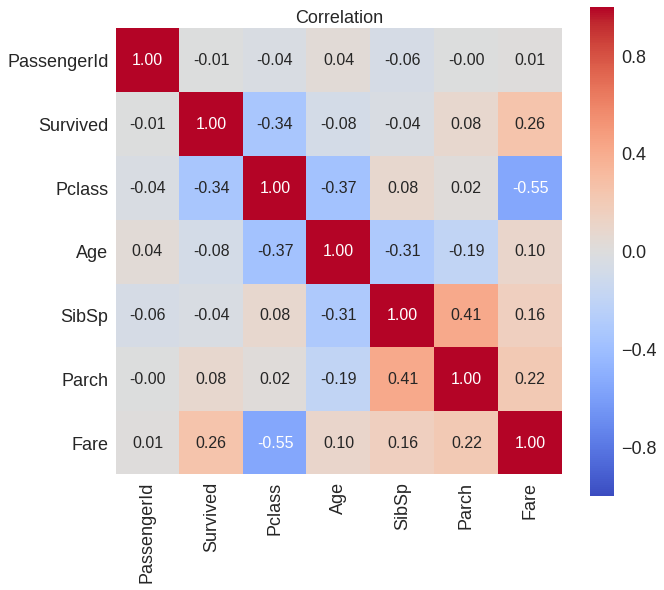

In [23]:
# ------------------------------------------------------------------------------------------
print_variable_html('1st Look')
plot_correlation_map(titanic)

ref = """
# Ref another way to do this if I have a different flow
# Since all values are numeric, do a correction and sort to determine
corr = titanic.corr()
corr.sort_values(['Survived'], ascending = False, inplace = True)
print(corr.Survived)
"""
# ------------------------------------------------------------------------------------------

<font color=blue>**From the correlation map...**</font>
* The **Pclass** and **fare** have the highest correlation with the target and there no missing values for these.  
*  While **Age** seem to have not significant correlation with the target, <blockquote>the [Women and children first](https://en.wikipedia.org/wiki/Women_and_children_first) is a code of conduct dating from 1852, whereby the lives of women and children were to be saved first in a life-threatening situation, typically abandoning ship, when survival resources such as lifeboats were limited.</blockquote> 
So, I don't think I'll ignore it. 
* **SibSp** and **Parch** has quite low correlation. However, I think there is a possbility that together it forms a kind of proxy to a theory that travelling in a groups have higher chance of survival as there are people looking after you. However, in a time of crisis, it not be easily to multitask and look after many people. So, I am suspecting passengers from smaller group size stand a better chance to survive. 

#### ![Data Wrangle & Data Cleaning](https://i.supload.com/B1fvRVvR6X.png)     

<hr>

####<font color=blue>Embarked has the least number of missing values, i.e., 2</font>

In [24]:
# ------------------------------------------------------------------------------------------
embarkedNull =titanic['Embarked'].isnull() 
display(titanic[embarkedNull])
# ------------------------------------------------------------------------------------------


PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN

<hr>
<font color=blue>I'm assuming the passenger with missing values for Embarked are travelleing together because they have same value for Ticket and Cabin. Incidently, this mean that SibSp and Parch columns are not the only columns indicative of travelling within a group.</font>

<font color='blue'>Filling for Embarked</font>
<font color='blue'>Embarked: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)</font>
* Has 2 Passengers (IDs 62 and 830) missing embarkation point
* PassengerId 830 and 62 are  Mrs. George Nelson (Martha Evelyn) and her maid, Miss. Amelie Icard in the same cabin B28 with the same ticket number
After searching for online, I came across their description in the following 
    1.  https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html
    2.  https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html
* It was stated embarkation point as Southhampton

Therefore, I decided to fill the remaining 2 missing values with 'S' for Southhampton. Without this information, I would have also fill with 'S' as that is the modal value anyway.

In [25]:
# ------------------------------------------------------------------------------------------
print_variable_html('Embarked ', 'before fill')
display(titanic['Embarked'].value_counts())
titanic['Embarked'].fillna('S', inplace=True)

print_variable_html('Embarked ', 'after fill')
display(titanic['Embarked'].value_counts())
# ------------------------------------------------------------------------------------------

S    644
C    168
Q     77
Name: Embarked, dtype: int64

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [0]:
# ------------------------------------------------------------------------------------------
# Fill for test
titanicTest['Embarked'].fillna('S', inplace=True)
# ------------------------------------------------------------------------------------------

<hr>

#### <font color='blue'>Filling for Age</font>

<font color='blue'>**First with external data**</font>
<br>
- There were many passengers in the data with Age missing. 
- After coming across [https://www.encyclopedia-titanica.org/titanic-passengers-and-crew/](https://www.encyclopedia-titanica.org/titanic-passengers-and-crew/), I found there are areage data there.
- I explore and found some missing age can before found there. 
- I extracted the data and tried to mapped for missing age. The most straightforward was to use the name but had to be conscious of the case (uppercase mixed case) are difference. That provided more of the age data. 
- For thpse still without age data, I laboriously went through the data manually looking at names, ticket and cabin to try to identify the correct age as much as possible.
    * There were some difference in spelling which I made logical assumption that they are same person by looking the the ticket, cabin and the phonetic of the names that were spelled different between the dataset and that in the website. I concluded part of the reason to be attributed to non-English names that were the result of the difference in names. 
- In the end, I manually prepared a PassengerId and Age mapping for the passengers in the dataset that were missing the age and loaded the file into [github](https://github.com/) to read in and merged with dataset: ageFillDataUrl = '[https://raw.githubusercontent.com/ace108/titanic-ca1/master/dataset/titanicFillAge.csv](https://raw.githubusercontent.com/ace108/titanic-ca1/master/dataset/titanicFillAge.csv)'


In [27]:
# ------------------------------------------------------------------------------------------
# List out all variables with nulls/missing values
missingValues = pd.DataFrame(titanic.isnull().sum(), columns=['Count'])
columnsWithMissingValues = print(missingValues[missingValues['Count']>0])
columnsWithMissingValues
# ------------------------------------------------------------------------------------------

       Count
Age      177
Cabin    687


In [28]:
# ------------------------------------------------------------------------------------------
ageFillData = pd.read_csv(ageFillDataUrl)
# ageFillData.head(8)

ageCountBefore = titanic['Age'].count()
ageMeanBefore = round(float(titanic['Age'].mean()),2)
ageMedianBefore = round(float(titanic['Age'].median()),2)
ageModeBefore = round(float(titanic['Age'].mode()),2)

female = titanic['Sex']=='female'
femalePassengers = titanic[female]
ageFemaleMeanBefore = round(femalePassengers['Age'].mean(),2)
ageFemaleMedianBefore = round(femalePassengers['Age'].median(),2)

male = titanic['Sex']=='male'
malePassengers = titanic[male]
ageMaleMeanBefore = round(malePassengers['Age'].mean(),2)
ageMaleMedianBefore = round(malePassengers['Age'].median(),2)

print_variable_html('Before filling age,', 'columns with missing values')
# List out all variables with nulls/missing values
missingValues = pd.DataFrame(titanic.isnull().sum(), columns=['Count'])
columnsWithMissingValues = print(missingValues[missingValues['Count']>0])
print(columnsWithMissingValues)

# Merging in age data from Encyclopedia Titanic
titanicTrainAgeFilledData = pd.merge(titanic, ageFillData, how='outer', on='PassengerId')
whereAgeMissing = titanicTrainAgeFilledData['Age'].isnull()
titanicTrainAgeFilledData.loc[titanicTrainAgeFilledData['Age'].isnull(), 'Age'] = titanicTrainAgeFilledData[whereAgeMissing]['AgeFill']

ageCountAfter = titanicTrainAgeFilledData['Age'].count()
ageMeanAfter = round(float(titanicTrainAgeFilledData['Age'].mean()),2)
ageMedianAfter = round(float(titanicTrainAgeFilledData['Age'].median()),2)
ageModeAfter = round(float(titanicTrainAgeFilledData['Age'].mode()),2)

female = titanic['Sex']=='female'
femalePassengers = titanic[female]
ageFemaleMeanAfter = round(femalePassengers['Age'].mean(),2)
ageFemaleMedianAfter = round(femalePassengers['Age'].median(),2)

male = titanic['Sex']=='male'
malePassengers = titanic[male]
ageMaleMeanAfter = round(malePassengers['Age'].mean(),2)
ageMaleMedianAfter = round(malePassengers['Age'].median(),2)


print_line('-')
titanicTrainAgeFilledData.drop(['AgeFill'], axis=1, inplace=True)
print_variable_html('After filling age with Encyclopedia Titanic data', 'columns with missing values')
missingValues = pd.DataFrame(titanicTrainAgeFilledData.isnull().sum(), columns=['Count'])
columnsWithMissingValues = print(missingValues[missingValues['Count']>0])
print(columnsWithMissingValues)


ageCountIncreasePercent = np.round( ((ageCountAfter - ageCountBefore) *100 / ageCountBefore))
print_variable_html(f'Age count increased from {ageCountBefore} to {ageCountAfter} by ', f'{ageCountIncreasePercent}%')
print_variable_html(f'Age mean, BEFORE={ageMeanBefore}, AFTER={ageMeanAfter}')
print_variable_html(f'Age median BEFORE={ageMedianBefore} AFTER={ageMedianAfter}')
print_variable_html(f'Age mode BEFORE={ageModeBefore} AFTER={ageModeAfter}')


print_variable_html(f'Female Age mean, BEFORE={ageFemaleMeanBefore}, AFTER={ageFemaleMeanAfter}')
print_variable_html(f'Female Age median BEFORE={ageFemaleMedianBefore} AFTER={ageFemaleMedianAfter}')


print_variable_html(f'Male Age mean, BEFORE={ageMaleMeanBefore}, AFTER={ageMaleMeanAfter}')
print_variable_html(f'Male Age median BEFORE={ageMaleMedianBefore} AFTER={ageMaleMedianAfter}')
# ------------------------------------------------------------------------------------------

       Count
Age      177
Cabin    687
None
--------------------------------------------------------------------------------


       Count
Age        3
Cabin    687
None


In [29]:
# ------------------------------------------------------------------------------------------
print_variable_html('Who still has age missing?')
display(titanicTrainAgeFilledData[titanicTrainAgeFilledData['Age'].isnull()])
# ------------------------------------------------------------------------------------------

PassengerId  Survived  Pclass                    Name   Sex  Age  SibSp  \
5              6         0       3        Moran, Mr. James  male  NaN      0   
42            43         0       3     Kraeff, Mr. Theodor  male  NaN      0   
420          421         0       3  Gheorgheff, Mr. Stanio  male  NaN      0   

     Parch  Ticket    Fare Cabin Embarked  
5        0  330877  8.4583   NaN        Q  
42       0  349253  7.8958   NaN        C  
420      0  349254  7.8958   NaN        C

In [30]:
# ------------------------------------------------------------------------------------------
print_variable_html('Remaining passengers without age are male so I decided to fill them with new median age for male passengers which is 29.')

titanicTrainAgeFilledData.loc[titanicTrainAgeFilledData['Age'].isnull(), 'Age'] = int(ageMaleMedianAfter)

titanicTrainAgeFilledData[ ((titanicTrainAgeFilledData['PassengerId'] == 6) | (titanicTrainAgeFilledData['PassengerId'] == 43) | (titanicTrainAgeFilledData['PassengerId'] == 421)) ]

titanic = titanicTrainAgeFilledData
# ------------------------------------------------------------------------------------------

In [0]:
# Fill for test median
titanicTest['Age'].fillna(28, inplace=True)

<hr>
### <font color='blue'>Determine travel group size</font> 

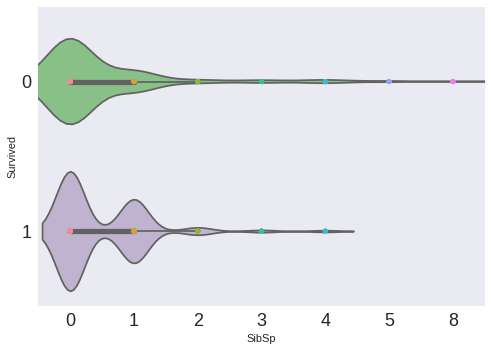

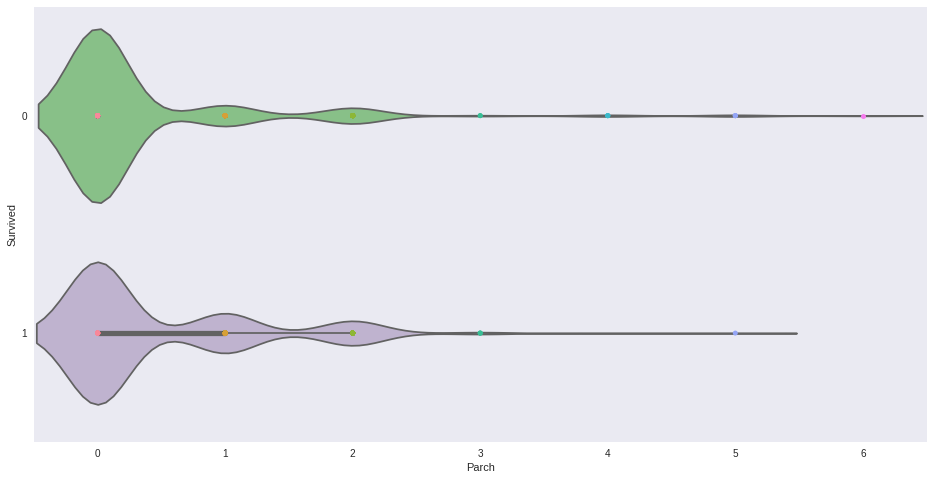

In [32]:
# ------------------------------------------------------------------------------------------           
print_variable_html('Looking at Family travelling together')
plot_violin(titanic, 'SibSp', target)
plot_violin(titanic, 'Parch', target)
# ------------------------------------------------------------------------------------------

<hr>

<font color='blue'>**Observations: **</font>
* While it seems, there are many people who travel without siblings or spouse or without parents or child did not survived, there are seemingly lone passengers who survived too.
* What is noticeable is that those who had one sibling or spouse or one parent or child seem to have better chance than those with more in the family.
* So, I'm creating a new feature to identify the travel group size which includes both SibSp and Parch and more.
* First, I think the family size travelling together matters. So, I first created column **familyCount** with includes SibSp, Parch and the passenger himself/herself.


In [33]:
# ------------------------------------------------------------------------------------------
titanic['FamilyCount'] = titanic['SibSp'] +  titanic['Parch'] + 1
df_sample(titanic, 4)
# ------------------------------------------------------------------------------------------

PassengerId  Survived  Pclass                                      Name  \
16            17         0       3                      Rice, Master. Eugene   
148          149         0       2  Navratil, Mr. Michel ("Louis M Hoffman")   
647          648         1       1       Simonius-Blumer, Col. Oberst Alfons   
727          728         1       3                  Mannion, Miss. Margareth   

        Sex   Age  SibSp  Parch  Ticket     Fare Cabin Embarked  FamilyCount  
16     male   2.0      4      1  382652  29.1250   NaN        Q            6  
148    male  36.5      0      2  230080  26.0000    F2        S            3  
647    male  56.0      0      0   13213  35.5000   A26        C            1  
727  female  28.0      0      0   36866   7.7375   NaN        Q            1

In [0]:
# ------------------------------------------------------------------------------------------
# Same for Test set
titanicTest['FamilyCount'] = titanicTest['SibSp'] +  titanicTest['Parch'] + 1
# ------------------------------------------------------------------------------------------

<hr>

<font color='blue'>One case where the SibSp and Parch may not reflex the true size of group a passenger is travelling with is the number of people in the __same cabin*. I am assuming those in the same cabin to be travelling together. So, I created a new column **cabinCount** for counting number of peope in the same cabin.
</font>

In [35]:
# ------------------------------------------------------------------------------------------
titanic['CabinCount'] = titanic.groupby('Cabin')['Cabin'].transform('count')
# displaying a few passengers I saw from raw data that have people in his/her cabin. 
titanic[ ((titanic['PassengerId'] == 4) | (titanic['PassengerId'] == 11) | (titanic['PassengerId'] == 28)) ]
# ------------------------------------------------------------------------------------------


PassengerId  Survived  Pclass  \
3             4         1       1   
10           11         1       3   
27           28         0       1   

                                            Name     Sex   Age  SibSp  Parch  \
3   Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0   
10               Sandstrom, Miss. Marguerite Rut  female   4.0      1      1   
27                Fortune, Mr. Charles Alexander    male  19.0      3      2   

     Ticket   Fare        Cabin Embarked  FamilyCount  CabinCount  
3    113803   53.1         C123        S            2         2.0  
10  PP 9549   16.7           G6        S            3         4.0  
27    19950  263.0  C23 C25 C27        S            6         4.0

In [0]:
# ------------------------------------------------------------------------------------------
# Same for Test set
titanicTest['CabinCount'] = titanicTest.groupby('Cabin')['Cabin'].transform('count')
# ------------------------------------------------------------------------------------------

<hr>
<font color='blue'> Another case where the SibSp and Parch may not reflex the true size of group a passenger is travelling with is the number of people with the same ticket. I am assuming those having the same ticket were travelling together. So, I created a new column **ticketCount** for counting number of peope with the same ticket.
</font>

In [37]:
# ------------------------------------------------------------------------------------------
titanic['TicketCount'] = titanic.groupby('Ticket')['Ticket'].transform('count')

# displaying a few passengers I saw from raw data that have people having same ticket has him/her. 
titanic[ ((titanic['PassengerId'] == 170) | (titanic['PassengerId'] == 510) | (titanic['PassengerId'] == 644)) ]
# ------------------------------------------------------------------------------------------

PassengerId  Survived  Pclass             Name   Sex   Age  SibSp  Parch  \
169          170         0       3    Ling, Mr. Lee  male  28.0      0      0   
509          510         1       3   Lang, Mr. Fang  male  26.0      0      0   
643          644         1       3  Foo, Mr. Choong  male  32.0      0      0   

    Ticket     Fare Cabin Embarked  FamilyCount  CabinCount  TicketCount  
169   1601  56.4958   NaN        S            1         NaN            7  
509   1601  56.4958   NaN        S            1         NaN            7  
643   1601  56.4958   NaN        S            1         NaN            7

In [0]:
# ------------------------------------------------------------------------------------------
# Same for Test set
titanicTest['TicketCount'] = titanicTest.groupby('Ticket')['Ticket'].transform('count')
# ------------------------------------------------------------------------------------------

<hr>
<font color='blue'>Therefore travel group size is **maximum** of </font>**cabinCount, ticketCount and familyCount**.

In [39]:
# ------------------------------------------------------------------------------------------
titanic['TravelGroupSize'] = titanic[['CabinCount', 'TicketCount','FamilyCount']].max(axis=1)
df_sample(titanic, 4)
# ------------------------------------------------------------------------------------------

PassengerId  Survived  Pclass                       Name   Sex   Age  \
42            43         0       3        Kraeff, Mr. Theodor  male  29.0   
766          767         0       1  Brewe, Dr. Arthur Jackson  male  45.0   
817          818         0       2         Mallet, Mr. Albert  male  31.0   
837          838         0       3        Sirota, Mr. Maurice  male  20.0   

     SibSp  Parch           Ticket     Fare Cabin Embarked  FamilyCount  \
42       0      0           349253   7.8958   NaN        C            1   
766      0      0           112379  39.6000   NaN        C            1   
817      1      1  S.C./PARIS 2079  37.0042   NaN        C            3   
837      0      0           392092   8.0500   NaN        S            1   

     CabinCount  TicketCount  TravelGroupSize  
42          NaN            1              1.0  
766         NaN            1              1.0  
817         NaN            2              3.0  
837         NaN            1              1.0

In [0]:
# ------------------------------------------------------------------------------------------
# Same for Test set
titanicTest['TravelGroupSize'] = titanicTest[['CabinCount', 'TicketCount','FamilyCount']].max(axis=1)
# ------------------------------------------------------------------------------------------

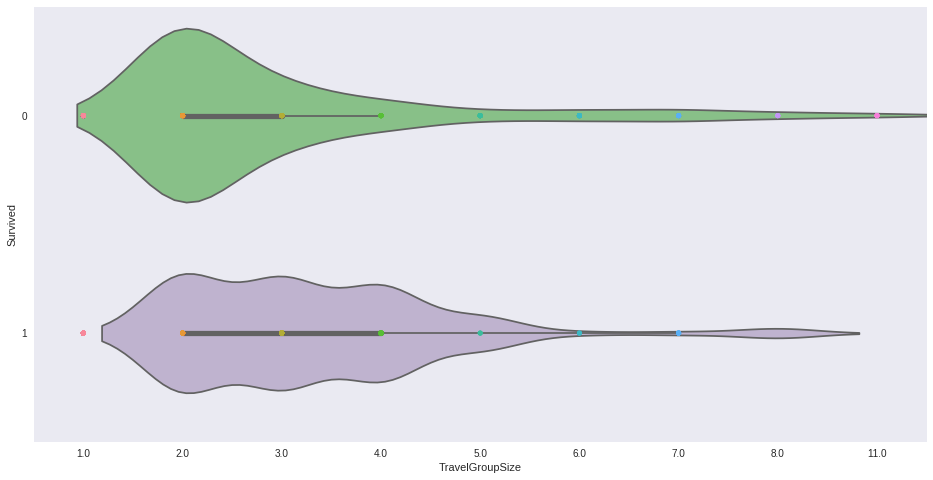

In [41]:
# ------------------------------------------------------------------------------------------
plot_violin(titanic, 'TravelGroupSize', target)
# ------------------------------------------------------------------------------------------

<font color='blue'>**Observation:** </font>
Now, it seems that the chances of survival is better when travelling with group of 2 to 4 people. 

<hr>

#### <font color='blue'>Handling for Cabin</font>


The Cabin data is related to the deck on which it is located. The first character represent the D and based on the infomration Wikipedia, the decks are:
* A Deck, also called the Promenade Deck, extended along the entire 546 feet (166 m) length of the superstructure. It was reserved exclusively for First Class passengers and contained First Class cabins, the First Class lounge, smoke room, reading and writing rooms and Palm Court. 
* B Deck, the Bridge Deck, was the top weight-bearing deck and the uppermost level of the hull. More First Class passenger accommodations were located here with six palatial staterooms (cabins) featuring their own private promenades. On Titanic, the À La Carte Restaurant and the Café Parisien provided luxury dining facilities to First Class passengers. Both were run by subcontracted chefs and their staff; all were lost in the disaster. The Second Class smoking room and entrance hall were both located on this deck. The raised forecastle of the ship was forward of the Bridge Deck, accommodating Number 1 hatch (the main hatch through to the cargo holds), numerous pieces of machinery and the anchor housings.  Aft of the Bridge Deck was the raised Poop Deck, 106 feet (32 m) long, used as a promenade by Third Class passengers. It was where many of Titanic's passengers and crew made their last stand as the ship sank. The forecastle and Poop Deck were separated from the Bridge Deck by well decks. 
* C Deck, the Shelter Deck, was the highest deck to run uninterrupted from stem to stern. It included both well decks; the aft one served as part of the Third Class promenade. Crew cabins were housed below the forecastle and Third Class public rooms were housed below the Poop Deck. In between were the majority of First Class cabins and the Second Class library. 
* D Deck, the Saloon Deck, was dominated by three large public rooms—the First Class Reception Room, the First Class Dining Saloon and the Second Class Dining Saloon. An open space was provided for Third Class passengers. First, Second and Third Class passengers had cabins on this deck, with berths for firemen located in the bow. It was the highest level reached by the ship's watertight bulkheads (though only by eight of the fifteen bulkheads). 
* E Deck, the Upper Deck, was predominantly used for passenger accommodation for all three classes plus berths for cooks, seamen, stewards and trimmers. Along its length ran a long passageway nicknamed Scotland Road, in reference to a famous street in Liverpool. Scotland Road was used by Third Class passengers and crew members. 
F Deck, the Middle Deck, was the last complete deck and mainly accommodated Second and Third Class passengers and several departments of the crew. The Third Class dining saloon was located here, as were the swimming pool, Turkish bath and kennels.
* G Deck, the Lower Deck, was the lowest complete deck that carried passengers, and had the lowest portholes, just above the waterline. The squash court was located here along with the traveling post office where letters and parcels were sorted ready for delivery when the ship docked. Food was also stored here. The deck was interrupted at several points by orlop (partial) decks over the boiler, engine and turbine rooms.
The Orlop Decks and the Tank Top below that were on the lowest level of the ship, below the waterline. The orlop decks were used as cargo spaces, while the Tank Top—the inner bottom of the ship's hull—provided the platform on which the ship's boilers, engines, turbines and electrical generators were housed. This area of the ship was occupied by the engine and boiler rooms, areas which passengers would have been prohibited from seeing. They were connected with higher levels of the ship by flights of stairs; twin spiral stairways near the bow provided access up to D Deck.

Source: [Wikipedia RMS_Titanic](https://en.wikipedia.org/wiki/RMS_Titanic)

<font color='blue'>**Thoughts:**</font>
* I think the passengers on the upper deck do stand a better chance getting to the life boat before those further away. 
* I considered the possibility the missing Cabin data can be deduced from the Ticket data. That means that passenger may just happened to have missing Cabin information recorded and if he/she was having the same ticket within a group, I can assume the passenger is in the same Cabin. However, this wasn't the case after looking at the data. 
* In the end, for those without Cabin, I'm filling with a value of **"Unknown"**

In [42]:
# ------------------------------------------------------------------------------------------
# List out all variables with nulls/missing values
print_variable_html('Before filling Cabin,', 'columns with missing values')
# display(titanic.describe(include='all').append(titanic.isnull().sum().rename('isnull')))
missingValues = pd.DataFrame(titanic.isnull().sum(), columns=['Count'])
columnsWithMissingValues = print(missingValues[missingValues['Count']>0])
print(columnsWithMissingValues)
# ------------------------------------------------------------------------------------------

            Count
Cabin         687
CabinCount    687
None


In [0]:
# ------------------------------------------------------------------------------------------
# Fill Cabin missing value with 'Unknown'
titanic['Cabin'].fillna( 'Unknown', inplace=True )
# ------------------------------------------------------------------------------------------

In [44]:
# ------------------------------------------------------------------------------------------
# List out all variables with nulls/missing values
print_variable_html('After filling Cabin,', 'columns with missing values')
#display(titanic.describe(include='all').append(titanic.isnull().sum().rename('isnull')))
missingValues = pd.DataFrame(titanic.isnull().sum(), columns=['Count'])
columnsWithMissingValues = print(missingValues[missingValues['Count']>0])
print(columnsWithMissingValues)
# ------------------------------------------------------------------------------------------

            Count
CabinCount    687
None


In [0]:
# ------------------------------------------------------------------------------------------
# Same for Test set
titanicTest['Cabin'].fillna( 'Unknown', inplace=True )
# ------------------------------------------------------------------------------------------

<hr>

<font color='blue'>Create new column **"CabinClass"** based on first character on "Cabin" column.</font>

In [46]:
# ------------------------------------------------------------------------------------------
titanic['CabinClass'] = titanic['Cabin'].str[0]
cabinCount =  titanic['CabinClass'].value_counts().sort_index()
print_variable_html('Summary of "CabinClass"')
display(pd.DataFrame(cabinCount))
# ------------------------------------------------------------------------------------------

CabinClass
A          15
B          47
C          59
D          33
E          32
F          13
G           4
T           1
U         687

In [47]:
# ------------------------------------------------------------------------------------------
print_variable_html('What is T and Who has Cabin starting with character "T"?')
titanic[titanic['CabinClass']=='T']
# ------------------------------------------------------------------------------------------

PassengerId  Survived  Pclass                          Name   Sex   Age  \
339          340         0       1  Blackwell, Mr. Stephen Weart  male  45.0   

     SibSp  Parch  Ticket  Fare Cabin Embarked  FamilyCount  CabinCount  \
339      0      0  113784  35.5     T        S            1         1.0   

     TicketCount  TravelGroupSize CabinClass  
339            1              1.0          T

<font color='blue'>**Findings on T Cabin passenger**</font><br>
* The passenger with Cabin T is the only one with that Cabin.
* He is only one in the cabin which is on the boat deck.
    Source: [https://www.encyclopedia-titanica.org/titanic-victim/stephen-weart-blackwell.html](https://www.encyclopedia-titanica.org/titanic-victim/stephen-weart-blackwell.html)
* Mr Stephen Weart Blackwell - Cabin T on the Boat Deck which I believe to be above the A Deck. 
* So, I am mapping the CabinClass into pseudo  thus: {"A": 2, "B":3, "C":4, "D":5, "E":6, "F":7, "G":8, "T":1, "U":9} 


In [48]:
# ------------------------------------------------------------------------------------------
# Same for Test Set
titanicTest['CabinClass'] = titanicTest['Cabin'].str[0]
cabinCount =  titanicTest['CabinClass'].value_counts().sort_index()
display(pd.DataFrame(cabinCount))
# ------------------------------------------------------------------------------------------

CabinClass
A           7
B          18
C          35
D          13
E           9
F           8
G           1
U         327

<hr>

<font color='blue'>**Map the class to the pseudo level and remove "Cabin" column in favor of CabinClass** which is a sort of indicator of how deep level the cabin may be. </font>

In [49]:
# ------------------------------------------------------------------------------------------
cabinLevelMap = {"A": 2, "B":3, "C":4, "D":5, "E":6, "F":7, "G":8, "T":1, "U":9}                 
titanic['CabinClass'] = titanic['CabinClass'].map(cabinLevelMap)
cabinCount =  titanic['CabinClass'].value_counts().sort_index()
print_variable_html('Summary of "CabinClass"')
display(pd.DataFrame(cabinCount))

# remove Cabin column in favour of CabinClass
titanic.drop(columns=['Cabin'], inplace=True)
# ------------------------------------------------------------------------------------------


CabinClass
1           1
2          15
3          47
4          59
5          33
6          32
7          13
8           4
9         687

In [50]:
# ------------------------------------------------------------------------------------------
# Same for Test set
titanicTest['CabinClass'] = titanicTest['CabinClass'].map(cabinLevelMap)
cabinCount =  titanicTest['CabinClass'].value_counts().sort_index()
print_variable_html('Summary of "CabinClass"')
display(pd.DataFrame(cabinCount))

# remove Cabin column in favour of CabinClass
titanicTest.drop(columns=['Cabin'], inplace=True)
# ------------------------------------------------------------------------------------------

CabinClass
2           7
3          18
4          35
5          13
6           9
7           8
8           1
9         327

<hr> 

#### <font color='blue'>Corrrelation Review</font>

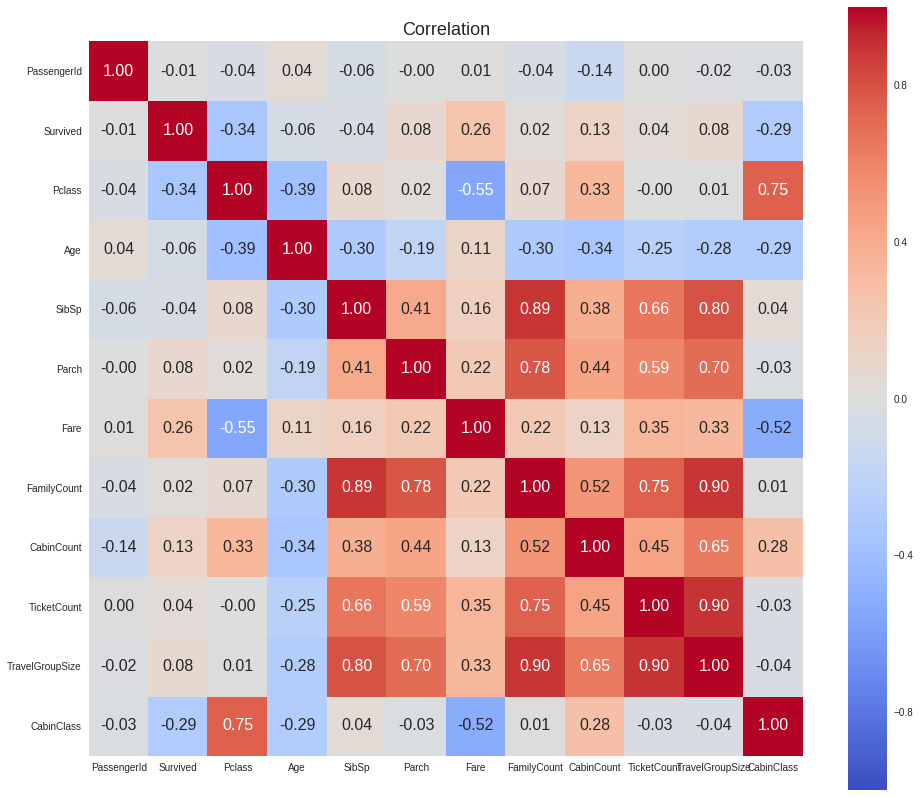

In [51]:
# ------------------------------------------------------------------------------------------            
print_variable_html('2nd Look', '')
plot_correlation_map(titanic)
# ------------------------------------------------------------------------------------------

<font color='blue'>Observations: **</font>
* The **TravelGroupSize** has a higher correlation than SibSp, FamilyCount, CabinCount and TicketCount. 
* However,  it is still not higher than the Parch. Perhaps, the parent child relationship is a strong determinant factor.
* So, I decided to keep **Parch**, include TravelGroupSize but exclude SibSp and the new columns FamilyCount, CabinCount and TicketCount.


In [52]:
# ------------------------------------------------------------------------------------------            
titanic.drop(columns=['SibSp', 'FamilyCount', 'CabinCount', 'TicketCount'], inplace=True)
display(titanic.describe(include='all').append(titanic.isnull().sum().rename('isnull')))
# ------------------------------------------------------------------------------------------

PassengerId    Survived      Pclass                    Name   Sex  \
count    891.000000  891.000000  891.000000                     891   891   
unique          NaN         NaN         NaN                     891     2   
top             NaN         NaN         NaN  Newell, Miss. Marjorie  male   
freq            NaN         NaN         NaN                       1   577   
mean     446.000000    0.383838    2.308642                     NaN   NaN   
std      257.353842    0.486592    0.836071                     NaN   NaN   
min        1.000000    0.000000    1.000000                     NaN   NaN   
25%      223.500000    0.000000    2.000000                     NaN   NaN   
50%      446.000000    0.000000    3.000000                     NaN   NaN   
75%      668.500000    1.000000    3.000000                     NaN   NaN   
max      891.000000    1.000000    3.000000                     NaN   NaN   
isnull     0.000000    0.000000    0.000000                       0     0   

               Age       Parch    Ticket        Fare Embarked  \
count   891.000000  891.000000       891  891.000000      891   
unique         NaN         NaN       681         NaN        3   
top            NaN         NaN  CA. 2343         NaN        S   
freq           NaN         NaN         7         NaN      646   
mean     29.513098    0.381594       NaN   32.204208      NaN   
std      14.115616    0.806057       NaN   49.693429      NaN   
min       0.420000    0.000000       NaN    0.000000      NaN   
25%      20.000000    0.000000       NaN    7.910400      NaN   
50%      28.000000    0.000000       NaN   14.454200      NaN   
75%      38.000000    0.000000       NaN   31.000000      NaN   
max      80.000000    6.000000       NaN  512.329200      NaN   
isnull    0.000000    0.000000         0    0.000000        0   

        TravelGroupSize  CabinClass  
count        891.000000  891.000000  
unique              NaN         NaN  
top                 NaN         NaN  
freq                NaN         NaN  
mean           2.143659    7.936027  
std            1.685900    2.074282  
min            1.000000    1.000000  
25%            1.000000    9.000000  
50%            2.000000    9.000000  
75%            3.000000    9.000000  
max           11.000000    9.000000  
isnull         0.000000    0.000000

In [0]:
# ------------------------------------------------------------------------------------------
# Same for Test set
titanicTest.drop(columns=['SibSp', 'FamilyCount', 'CabinCount', 'TicketCount'], inplace=True)
# ------------------------------------------------------------------------------------------

#### <font color='blue'>Reivew Numeric and Non-Numeric columns</font>

In [54]:
# ------------------------------------------------------------------------------------------
# Get list of numeric and non-numeric variables
numvars = list(titanic.columns[titanic.dtypes != 'object'])
nonnumvars  = list(titanic.columns[titanic.dtypes == 'object'])

numAuxVerb = 's are' if (len(numvars)>1) else ' is'
print_variable_html (f'Numeric column{numAuxVerb} ', f'{numvars}') 

nonNumAuxVerb = 's are' if (len(nonnumvars)>1) else ' is'
print_variable_html (f'Non-numeric column{nonNumAuxVerb} ', f'{nonnumvars}') 

# ------------------------------------------------------------------------------------------

In [55]:
# ------------------------------------------------------------------------------------------
# Do some further exploration on list to get list of features used
numfeats = numvars
numfeats.remove('PassengerId')
numfeats.remove('Survived')
numAuxVerb = 's are' if (len(numfeats)>1) else ' is'
print_variable_html (f'Numeric feature{numAuxVerb} ', f'{numfeats}') 


nonnumfeats = nonnumvars
nonnumfeats.remove('Name')
nonNumAuxVerb = 's are' if (len(nonnumvars)>1) else ' is'
print_variable_html (f'Non-numeric feature{nonNumAuxVerb} ', f'{nonnumfeats}') 

# ------------------------------------------------------------------------------------------

<font color='blue'>Review non-numeric columns. </font>
* **Note**: Column name ending with ID is skipped. 


Survived    0    1  Total
Sex                      
female     81  233    314
male      468  109    577

Survived          0          1  Total
Sex                                  
female    25.796178  74.203822  100.0
male      81.109185  18.890815  100.0

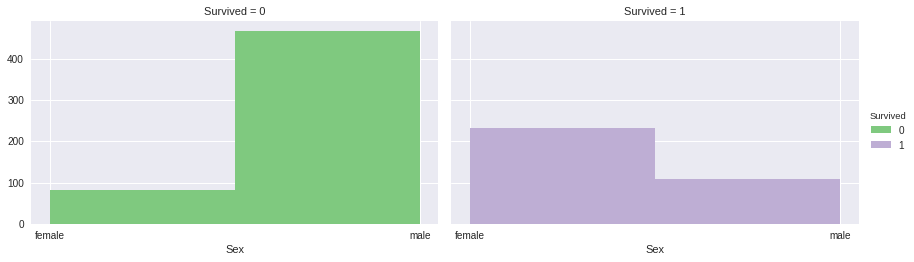

--------------------------------------------------------------------------------


--------------------------------------------------------------------------------


Survived    0    1  Total
Embarked                 
C          75   93    168
Q          47   30     77
S         427  219    646

Survived          0          1  Total
Embarked                             
C         44.642857  55.357143  100.0
Q         61.038961  38.961039  100.0
S         66.099071  33.900929  100.0

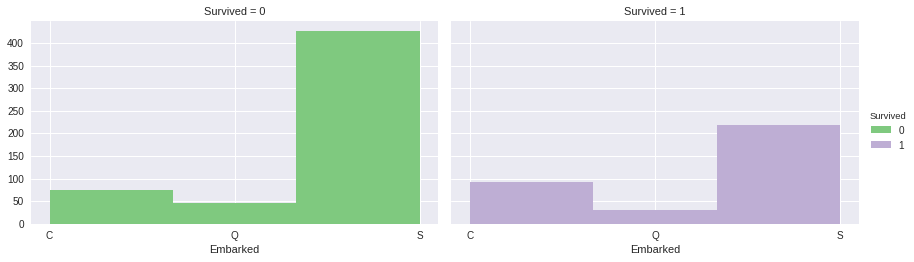

--------------------------------------------------------------------------------


In [56]:
# -----------------------------------------------------------------------------------------------------------------------
# pd.options.display.float_format = '{:.2f}%'.format
snsPalette = 'Accent'
for col in nonnumfeats:
    nullColCount = titanic[col].isnull().sum()
    nonNullColCount = titanic[col].count()
    ucount = (titanic[col].nunique())
    print_variable_html(f'Column ["{col}"] has {nonNullColCount} not null values, {nullColCount} null values and {ucount} unique values.')
    
    # List valuse for the column less than 10 unique values
    if ucount<10:
#        columnValueCount = titanic[col].value_counts()
#        display(titanic[col].value_counts())
        print_variable_html(f'Column ["{col}"] vs ["{target}"]', ' by count')                  
        colSurvivalCountStats = pd.crosstab(titanic[col], titanic[target])
        colSurvivalCountStats['Total'] = colSurvivalCountStats[0] + colSurvivalCountStats[1]
        display(colSurvivalCountStats)

        
        print_variable_html(f'Column ["{col}"] vs ["{target}"]', ' by percentage')                          
        colSurvivalPercentStats = pd.crosstab(titanic[col], titanic[target]).apply(lambda r: r*100/r.sum(), axis=1)
        colSurvivalPercentStats['Total'] = colSurvivalPercentStats[0] + colSurvivalPercentStats[1]
        display(colSurvivalPercentStats)
        
    
    if (col[-2:].upper()!='ID'):
        nullColCount = titanic[col].isnull().sum()
        nonNullColCount = titanic[col].count()
        ucount = (titanic[col].nunique())
        
        if ucount>2:
            noOfBins = min(ucount,9)
        else:
            noOfBins = 2


        # wantToPlot = get_yes_no_condition(f'Do you want to plot for column ["{col}"] by ["{target}"]')
#        if wantToPlot:
        if ucount<20:
            g = sns.FacetGrid(titanic, col=target, size=3.8, aspect=1.6, hue=target, palette=snsPalette)
            g.map(plt.hist, col, bins=noOfBins)
            g.add_legend()
            plt.show()

           
        elif (ucount>=20) & (ucount<(0.5*noOfRows)): 
            sns.boxplot(x=target, y=col,
                        hue=target, palette=snsPalette,
                        data=titanic)
#            sns.despine(offset=10, trim=True)
            plt.show()

    
            
    else:
        print_variable_html(f'Not plotting for ID Columun {col}')
    print_line('-')    
# -----------------------------------------------------------------------------------------------------------------------

<font color='blue'>**Observations:**</font>
* The survival rate of female were more than male.    
* Most of the passengers embarked at Southhampton so it's not surprising that of the people who did not survived are those who embarked at Southhampton. 
* What is interesting is, of the people who embarked at Cherbourg, a higher proportion of the them survived than not.
* Therefore, not dropping the Embarked even thought the 3 ports are not too far away from each other.

<font color='blue'>Review numeric columns. </font>
* **Note**: Column name ending with ID is skipped.

Survived    0    1  Total
Pclass                   
1          80  136    216
2          97   87    184
3         372  119    491

Survived          0          1  Total
Pclass                               
1         37.037037  62.962963  100.0
2         52.717391  47.282609  100.0
3         75.763747  24.236253  100.0

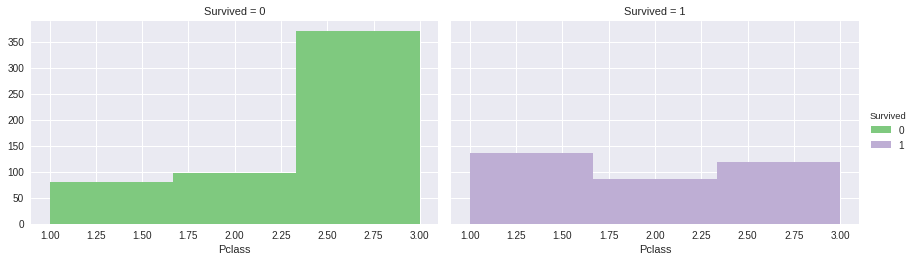

--------------------------------------------------------------------------------


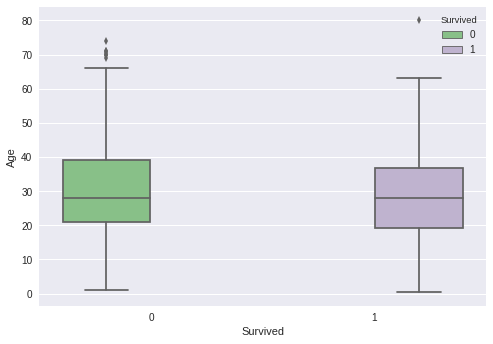

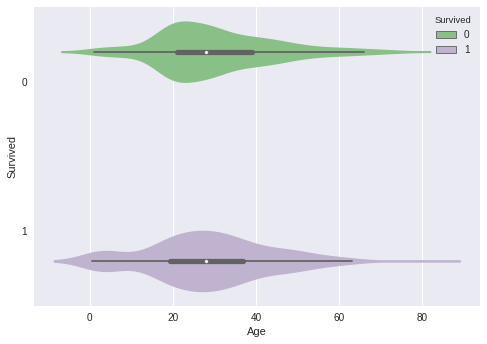

--------------------------------------------------------------------------------


Survived    0    1  Total
Parch                    
0         445  233    678
1          53   65    118
2          40   40     80
3           2    3      5
4           4    0      4
5           4    1      5
6           1    0      1

Survived           0          1  Total
Parch                                 
0          65.634218  34.365782  100.0
1          44.915254  55.084746  100.0
2          50.000000  50.000000  100.0
3          40.000000  60.000000  100.0
4         100.000000   0.000000  100.0
5          80.000000  20.000000  100.0
6         100.000000   0.000000  100.0

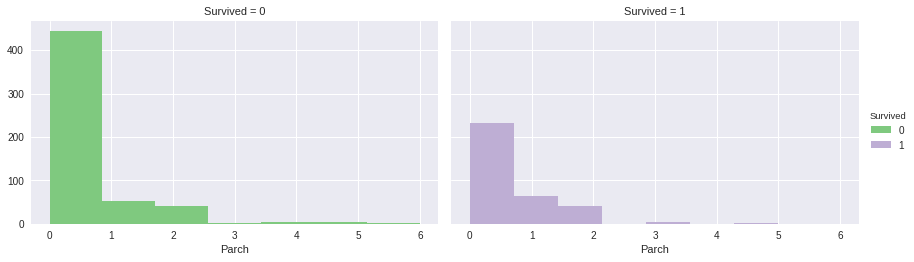

--------------------------------------------------------------------------------


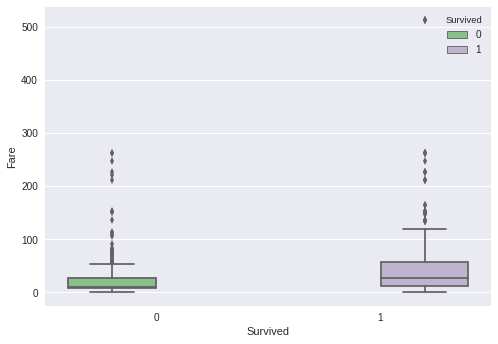

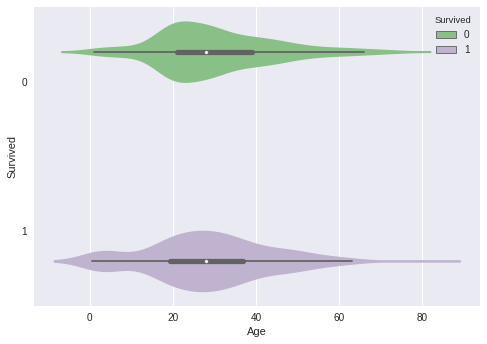

--------------------------------------------------------------------------------


Survived           0    1  Total
TravelGroupSize                 
1.0              331  109    440
2.0               97  100    197
3.0               47   87    134
4.0               15   31     46
5.0               17    3     20
6.0               19    3     22
7.0               10    9     19
8.0                6    0      6
11.0               7    0      7

Survived                  0          1  Total
TravelGroupSize                              
1.0               75.227273  24.772727  100.0
2.0               49.238579  50.761421  100.0
3.0               35.074627  64.925373  100.0
4.0               32.608696  67.391304  100.0
5.0               85.000000  15.000000  100.0
6.0               86.363636  13.636364  100.0
7.0               52.631579  47.368421  100.0
8.0              100.000000   0.000000  100.0
11.0             100.000000   0.000000  100.0

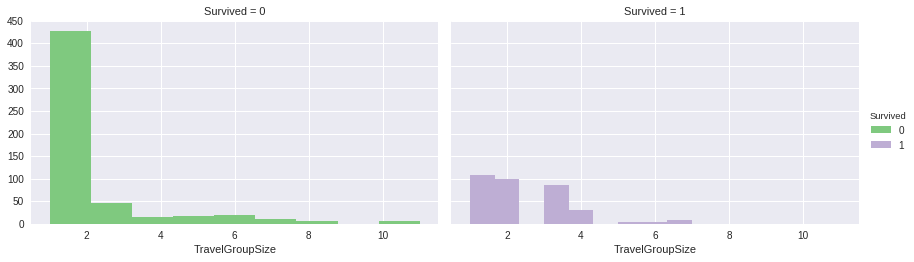

--------------------------------------------------------------------------------


Survived      0    1  Total
CabinClass                 
1             1    0      1
2             8    7     15
3            12   35     47
4            24   35     59
5             8   25     33
6             8   24     32
7             5    8     13
8             2    2      4
9           481  206    687

Survived             0          1  Total
CabinClass                              
1           100.000000   0.000000  100.0
2            53.333333  46.666667  100.0
3            25.531915  74.468085  100.0
4            40.677966  59.322034  100.0
5            24.242424  75.757576  100.0
6            25.000000  75.000000  100.0
7            38.461538  61.538462  100.0
8            50.000000  50.000000  100.0
9            70.014556  29.985444  100.0

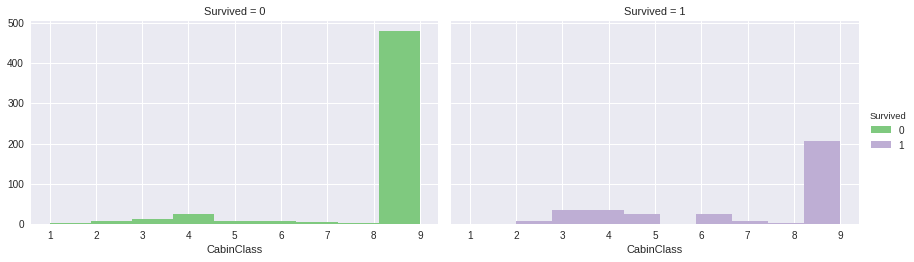

--------------------------------------------------------------------------------


In [57]:
# -----------------------------------------------------------------------------------------------------------------------
for col in numfeats:
    nullColCount = titanic[col].isnull().sum()
    nonNullColCount = titanic[col].count()
    ucount = (titanic[col].nunique())
    print_variable_html(f'Columun ["{col}"] has {nonNullColCount} not null values, {nullColCount} null values and {ucount} unique values.')
    
    
    nullCount = titanic[col].isnull().sum() 
    listOfValues = titanic[col].unique()

    
    # List values for the column less than 10 unique values
    if ucount<10:
        print_variable_html('List of values:', '')          
#        columnValueCount = titanic[col].value_counts()
#        display(titanic[col].value_counts())
        colSurvivalStats = pd.crosstab(titanic[col], titanic[target])
        colSurvivalStats['Total'] = colSurvivalStats[0] + colSurvivalStats[1]
        
        display(colSurvivalStats)

        
        print_variable_html(f'Column ["{col}"] vs ["{target}"]', ' by percentage')                          
        colSurvivalPercentStats = pd.crosstab(titanic[col], titanic[target]).apply(lambda r: r*100/r.sum(), axis=1)
        colSurvivalPercentStats['Total'] = colSurvivalPercentStats[0] + colSurvivalPercentStats[1]
        display(colSurvivalPercentStats)

        
        
    if (col[-2:].upper()!='ID'):
        nullColCount = titanic[col].isnull().sum()
        nonNullColCount = titanic[col].count()
        ucount = (titanic[col].nunique())
        
        # xxxxx
        colMean = round(titanic[col].mean(), 2)
        colMedian = round(titanic[col].median(), 2)
        colMode = titanic.loc[:, col].mode()[0]
        if ucount>2:
            print_variable_html(f'Mean = {colMean}, Median = {colMedian}, First Mode = {colMode} \n Filled values={nonNullColCount}, Null Values={nullColCount}')
            noOfBins = min(ucount,9)
        else:
            noOfBins = 2

        # wantToPlot = get_yes_no_condition(f'Do you want to plot for column ["{col}"] by ["{target}"]')
#        if wantToPlot:
        if ucount<20:
            g = sns.FacetGrid(titanic, col=target, size=3.8, aspect=1.6, hue=target, palette=snsPalette)
            g.map(plt.hist, col, bins=noOfBins)
            g.add_legend()
            plt.show()
        elif (ucount>=20) & (ucount<(0.5*noOfRows)): 
            sns.boxplot(x=target, y=col,
                        hue=target, palette=snsPalette,
                        data=titanic)
#            sns.despine(offset=10, trim=True)
            plt.show()

            sns.violinplot(x="Age", y="Survived", orient='h', hue=target, data=titanic, palette=snsPalette)
            plt.show()


   
    
    else:
        print_variable_html(f'Not plotting for ID Columun {col}')

    print_line('-') 
# -----------------------------------------------------------------------------------------------------------------------

<font color='blue'>**Observations**</font>
- High proportion of the 3rd class passengers did not survive and a high proportion of the 1st class passengers survived.     
- The age of the passengers who survived is bit skewed to the younger passengers. Many who didn't survived are in their 20s where most of the people who survived are more mature adults in the 30s. 
- Many didn't survived were not travelling with parent or child. 
- The fare data for survivors and victims are both skewed and the more of the people who paid higher fare survived.
- It looks like those travelling in smaller group had better chance to survive.
- Although a high percentage of passengers without cabin details survived, thechances are higher of them who did not survive.

In [58]:
# ------------------------------------------------------------------------------------------
df_sample(titanic,4)
# ------------------------------------------------------------------------------------------


PassengerId  Survived  Pclass                                     Name  \
69            70         0       3                        Kink, Mr. Vincenz   
520          521         1       1                    Perreault, Miss. Anne   
590          591         0       3                     Rintamaki, Mr. Matti   
736          737         0       3  Ford, Mrs. Edward (Margaret Ann Watson)   

        Sex   Age  Parch             Ticket     Fare Embarked  \
69     male  26.0      0             315151   8.6625        S   
520  female  30.0      0              12749  93.5000        S   
590    male  35.0      0  STON/O 2. 3101273   7.1250        S   
736  female  48.0      3         W./C. 6608  34.3750        S   

     TravelGroupSize  CabinClass  
69               3.0           9  
520              2.0           3  
590              1.0           9  
736              5.0           9

In [0]:
# ------------------------------------------------------------------------------------------            
# Remove ['Ticket'] from non-numeric features  
nonnumfeats.remove('Ticket')
# ------------------------------------------------------------------------------------------            

In [60]:
# ------------------------------------------------------------------------------------------            
# Encode all the categorical variables
titanicdf = pd.get_dummies(titanic,columns=nonnumfeats)
df_sample(titanicdf,6)

display(titanicdf.describe(include='all').append(titanicdf.isnull().sum().rename('isnull')))
# ------------------------------------------------------------------------------------------            


PassengerId  Survived  Pclass  \
53            54         1       2   
287          288         0       3   
414          415         1       3   
629          630         0       3   
695          696         0       2   
713          714         0       3   

                                                  Name   Age  Parch  \
53   Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...  29.0      0   
287                               Naidenoff, Mr. Penko  22.0      0   
414                          Sundman, Mr. Johan Julian  44.0      0   
629                           O'Connell, Mr. Patrick D  18.0      0   
695                         Chapman, Mr. Charles Henry  52.0      0   
713                         Larsson, Mr. August Viktor  29.0      0   

                Ticket     Fare  TravelGroupSize  CabinClass  Sex_female  \
53                2926  26.0000              2.0           9           1   
287             349206   7.8958              1.0           9           0   
414  STON/O 2. 3101269   7.9250              1.0           9           0   
629             334912   7.7333              1.0           9           0   
695             248731  13.5000              1.0           9           0   
713               7545   9.4833              1.0           9           0   

     Sex_male  Embarked_C  Embarked_Q  Embarked_S  
53          0           0           0           1  
287         1           0           0           1  
414         1           0           0           1  
629         1           0           1           0  
695         1           0           0           1  
713         1           0           0           1

PassengerId    Survived      Pclass                    Name  \
count    891.000000  891.000000  891.000000                     891   
unique          NaN         NaN         NaN                     891   
top             NaN         NaN         NaN  Newell, Miss. Marjorie   
freq            NaN         NaN         NaN                       1   
mean     446.000000    0.383838    2.308642                     NaN   
std      257.353842    0.486592    0.836071                     NaN   
min        1.000000    0.000000    1.000000                     NaN   
25%      223.500000    0.000000    2.000000                     NaN   
50%      446.000000    0.000000    3.000000                     NaN   
75%      668.500000    1.000000    3.000000                     NaN   
max      891.000000    1.000000    3.000000                     NaN   
isnull     0.000000    0.000000    0.000000                       0   

               Age       Parch    Ticket        Fare  TravelGroupSize  \
count   891.000000  891.000000       891  891.000000       891.000000   
unique         NaN         NaN       681         NaN              NaN   
top            NaN         NaN  CA. 2343         NaN              NaN   
freq           NaN         NaN         7         NaN              NaN   
mean     29.513098    0.381594       NaN   32.204208         2.143659   
std      14.115616    0.806057       NaN   49.693429         1.685900   
min       0.420000    0.000000       NaN    0.000000         1.000000   
25%      20.000000    0.000000       NaN    7.910400         1.000000   
50%      28.000000    0.000000       NaN   14.454200         2.000000   
75%      38.000000    0.000000       NaN   31.000000         3.000000   
max      80.000000    6.000000       NaN  512.329200        11.000000   
isnull    0.000000    0.000000         0    0.000000         0.000000   

        CabinClass  Sex_female    Sex_male  Embarked_C  Embarked_Q  Embarked_S  
count   891.000000  891.000000  891.000000  891.000000  891.000000  891.000000  
unique         NaN         NaN         NaN         NaN         NaN         NaN  
top            NaN         NaN         NaN         NaN         NaN         NaN  
freq           NaN         NaN         NaN         NaN         NaN         NaN  
mean      7.936027    0.352413    0.647587    0.188552    0.086420    0.725028  
std       2.074282    0.477990    0.477990    0.391372    0.281141    0.446751  
min       1.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
25%       9.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
50%       9.000000    0.000000    1.000000    0.000000    0.000000    1.000000  
75%       9.000000    1.000000    1.000000    0.000000    0.000000    1.000000  
max       9.000000    1.000000    1.000000    1.000000    1.000000    1.000000  
isnull    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000

In [0]:
# ------------------------------------------------------------------------------------------
# Same for Test set 
titanicTestdf = pd.get_dummies(titanicTest,columns=nonnumfeats)
# ------------------------------------------------------------------------------------------


In [0]:
# ----------------------------------------------------------------------------------------
# Remove all columns that are object type except PassengerId
titanicdf.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# ----------------------------------------------------------------------------------------
ref = """
# Ref another way to do this if I have a different flow
columns = titanicdf.columns[titanicdf.dtypes != "object"]
titanicdf = titanicdf[columns]
titanicdf = titanicdf.drop(columns=['PassengerId'])
titanicdf.head(4)
"""


In [0]:
# ----------------------------------------------------------------------------------------
# Test set
titanicTestdf.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
# ----------------------------------------------------------------------------------------

<hr>

#### <font color='blue'>Corrrelation Review</font>

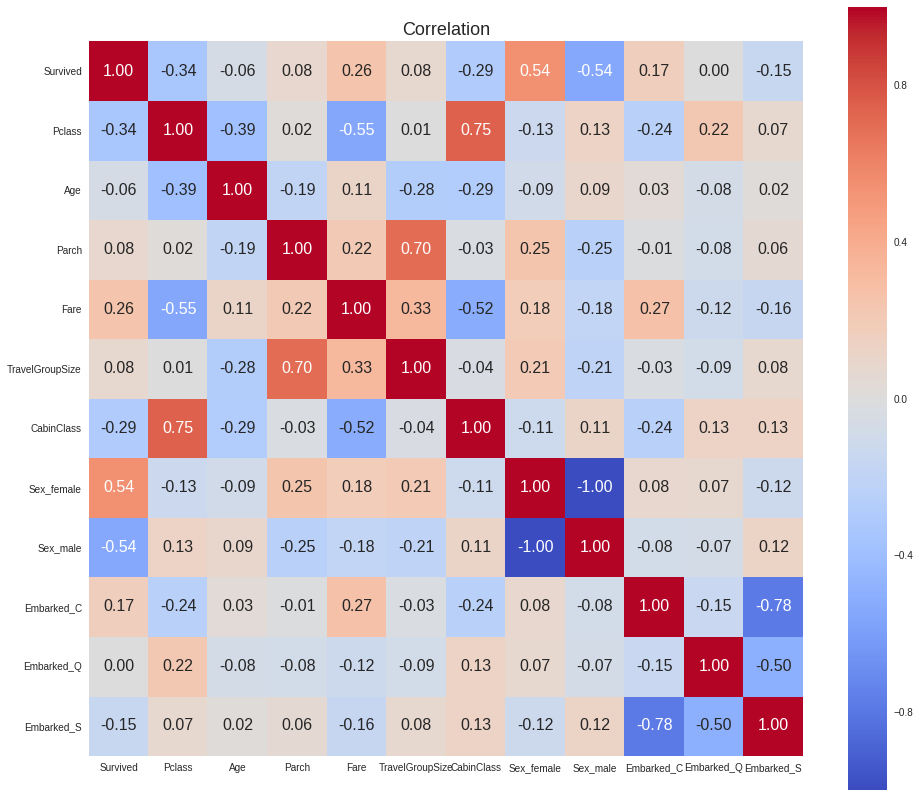

In [64]:
# ------------------------------------------------------------------------------------------            
print_variable_html('3rd Look')
plot_correlation_map(titanicdf)
# ------------------------------------------------------------------------------------------

#### ![Model Training](https://i.supload.com/ry7PRVP0a7.png) 


<hr>

#### <font color='blue'>Spltting to train and test sets</font>

In [65]:
# -----------------------------------------------------------------------------------------------------------------------
features = list(titanicdf.columns)
print_variable_html(f'Columns in dataset are {features}')
features = features[1:]
print_variable_html(f'Features for training the model are: {features}') 

df_sample(titanicdf, 4)
# -----------------------------------------------------------------------------------------------------------------------


Survived  Pclass   Age  Parch     Fare  TravelGroupSize  CabinClass  \
427         1       2  19.0      0  26.0000              2.0           9   
519         0       3  32.0      0   7.8958              1.0           9   
549         1       2   8.0      1  36.7500              3.0           9   
554         1       3  22.0      0   7.7750              1.0           9   

     Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
427           1         0           0           0           1  
519           0         1           0           0           1  
549           0         1           0           0           1  
554           1         0           0           0           1

In [66]:
# -----------------------------------------------------------------------------------------------------------------------
test_size = 0.2 # 20%

X = titanicdf[features]
y = titanicdf['Survived']

print_variable_html(f'Splitting {test_size*100}% for test set')
X_train_O, X_test_O, y_train_O, y_test_O = train_test_split(X, y, test_size=0.2)
print_variable_html(f'X_train_O.shape = {X_train_O.shape}, y_train_O.shape = {y_train_O.shape}, X_test_O.shape = {X_test_O.shape}, y_test_O.shape = {y_test_O.shape}')
if (X_train_O.shape[0]!=y_train_O.shape[0]):
    print_variable_html('Number of rows in X_train does not match that of y_train')
if (X_train_O.shape[1]!=X_test_O.shape[1]):
    print_variable_html('Number of columns in X_train does not match data of X_test')
if (X_test_O.shape[0]!=y_test_O.shape[0]):
    print_variable_html('Number of rows in X_test does not match that of y_test')
# -----------------------------------------------------------------------------------------------------------------------

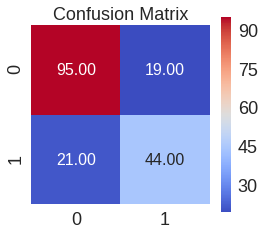

Feature  Correlation
6        Sex_female     2.219643
8        Embarked_C     0.718959
9        Embarked_Q     0.635376
10       Embarked_S     0.488422
3              Fare     0.005699
5        CabinClass    -0.022872
1               Age    -0.037258
4   TravelGroupSize    -0.070968
2             Parch    -0.183071
7          Sex_male    -0.376887
0            Pclass    -0.956215

In [67]:
# ------------------------------------------------------------------------------------------
# Logistic Regression

X_train, X_test, y_train, y_test = X_train_O.copy(), X_test_O.copy(), y_train_O.copy(), y_test_O.copy()
algo = 'Logistic Regression'
print_variable_html(f'Modeling with ', f'{algo}')
# -----------------------------------------------------------------------------------------------------------------------
modelBegin = time.clock()
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)

y_hat = logreg.predict(X_test)
modelEnd = time.clock() 
runtime_log = (modelEnd - modelBegin) * 1000
print_variable_html(f'Accuracy = {acc_log} vs ', f'Runtime {runtime_log}ms')

xval_log =cross_val_score(logreg, X_train, y_train, cv=4)
print_variable_html('Cross validation score = ', f'{xval_log}')

cm_log = pd.DataFrame(confusion_matrix(y_test,y_hat))
plot_heat_map(cm_log, 'Confusion Matrix')

# ------------------------------------------------------------------------------------------
coeff_df = pd.DataFrame(titanicdf.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)
# ------------------------------------------------------------------------------------------

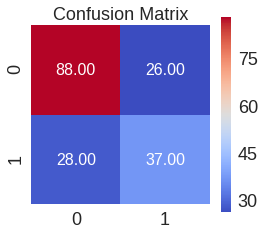

In [68]:
# ------------------------------------------------------------------------------------------
# Support Vector Machines

X_train, X_test, y_train, y_test = X_train_O.copy(), X_test_O.copy(), y_train_O.copy(), y_test_O.copy()
algo = 'Support Vector Machines'
print_variable_html(f'Modeling with ', f'{algo}')

modelBegin = time.clock()
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
y_hat = svc.predict(X_test)
modelEnd = time.clock() 
runtime_svc = (modelEnd - modelBegin) * 1000
print_variable_html(f'Accuracy = {acc_svc} vs ', f'Runtime {runtime_svc}ms')

xval_svc =cross_val_score(svc, X_train, y_train, cv=4)
print_variable_html('Cross validation score = ', f'{xval_svc}')

# Evaluation of the model (step 6)
cm_svm = pd.DataFrame(confusion_matrix(y_test,y_hat))
plot_heat_map(cm_svm, 'Confusion Matrix')

# ------------------------------------------------------------------------------------------

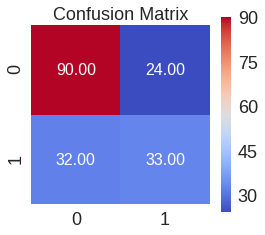

In [69]:
# ------------------------------------------------------------------------------------------
# k-Nearest Neighbors algorithm 
X_train, X_test, y_train, y_test = X_train_O.copy(), X_test_O.copy(), y_train_O.copy(), y_test_O.copy()
algo = 'k-Nearest Neighbors - 3'
print_variable_html(f'Modeling with ', f'{algo}')


modelBegin = time.clock()
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(X_train, y_train)
Y_pred = knn3.predict(X_test)
acc_knn3 = round(knn3.score(X_train, y_train) * 100, 2)
y_hat = knn3.predict(X_test)
modelEnd = time.clock() 
runtime_knn3 = (modelEnd - modelBegin) * 1000
print_variable_html(f'Accuracy = {acc_knn3} vs ', f'Runtime {runtime_knn3}ms')

xval_knn3 = cross_val_score(knn3, X_train, y_train, cv=4)
print_variable_html('Cross validation score = ', f'{xval_knn3}')

cm_knn3 = pd.DataFrame(confusion_matrix(y_test,y_hat))
plot_heat_map(cm_knn3, 'Confusion Matrix')

# ------------------------------------------------------------------------------------------

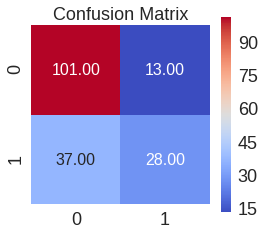

In [70]:
# ------------------------------------------------------------------------------------------
# k-Nearest Neighbors algorithm 
X_train, X_test, y_train, y_test = X_train_O.copy(), X_test_O.copy(), y_train_O.copy(), y_test_O.copy()
algo = 'k-Nearest Neighbors - 4'
print_variable_html(f'Modeling with ', f'{algo}')

modelBegin = time.clock()
knn4 = KNeighborsClassifier(n_neighbors = 4)
knn4.fit(X_train, y_train)
Y_pred = knn4.predict(X_test)
acc_knn4 = round(knn4.score(X_train, y_train) * 100, 2)
y_hat = knn4.predict(X_test)
modelEnd = time.clock() 
runtime_knn4 = (modelEnd - modelBegin) * 1000
print_variable_html(f'Accuracy = {acc_knn4} vs ', f'Runtime {runtime_knn4}ms')


xval_knn4 =cross_val_score(knn4, X_train, y_train, cv=4)
print_variable_html('Cross validation score = ', f'{xval_knn4}')

cm_knn4 = pd.DataFrame(confusion_matrix(y_test,y_hat))
plot_heat_map(cm_knn4, 'Confusion Matrix')


# ------------------------------------------------------------------------------------------

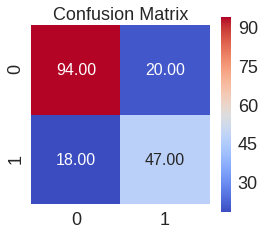

In [71]:
# ------------------------------------------------------------------------------------------
# Gaussian Naive Bayes
X_train, X_test, y_train, y_test = X_train_O.copy(), X_test_O.copy(), y_train_O.copy(), y_test_O.copy()
algo = 'Gaussian Naive Bayes'
print_variable_html(f'Modeling with ', f'{algo}')


modelBegin = time.clock()
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

y_hat = gaussian.predict(X_test)
modelEnd = time.clock() 
runtime_gaussian = (modelEnd - modelBegin) * 1000
print_variable_html(f'Accuracy = {acc_gaussian} vs ', f'Runtime {runtime_gaussian}ms')

xval_gaussian =cross_val_score(gaussian, X_train, y_train, cv=4)
print_variable_html('Cross validation score = ', f'{xval_gaussian}')

cm_gaussian = pd.DataFrame(confusion_matrix(y_test,y_hat))
plot_heat_map(cm_gaussian, 'Confusion Matrix')

# ------------------------------------------------------------------------------------------

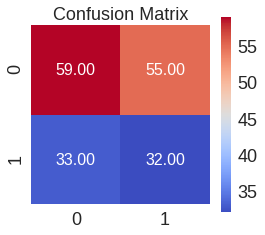

In [72]:
# ------------------------------------------------------------------------------------------
# Perceptron

X_train, X_test, y_train, y_test = X_train_O.copy(), X_test_O.copy(), y_train_O.copy(), y_test_O.copy()
algo = 'Perceptron'
print_variable_html(f'Modeling with ', f'{algo}')


modelBegin = time.clock()
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
y_hat = perceptron.predict(X_test)
modelEnd = time.clock() 
runtime_perceptron = (modelEnd - modelBegin) * 1000
print_variable_html(f'Accuracy = {acc_perceptron} vs ', f'Runtime {runtime_perceptron}ms')


xval_perceptron =cross_val_score(perceptron, X_train, y_train, cv=4)
print_variable_html('Cross validation score = ', f'{xval_perceptron}')

cm_perceptron = pd.DataFrame(confusion_matrix(y_test,y_hat))
plot_heat_map(cm_perceptron, 'Confusion Matrix')
# ------------------------------------------------------------------------------------------


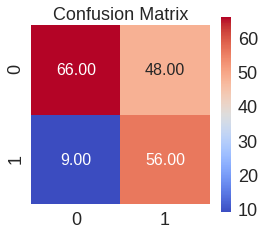

In [73]:
# ------------------------------------------------------------------------------------------
# Linear SVC
X_train, X_test, y_train, y_test = X_train_O.copy(), X_test_O.copy(), y_train_O.copy(), y_test_O.copy()
algo = 'Linear SVC'
print_variable_html(f'Modeling with ', f'{algo}')


modelBegin = time.clock()
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
y_hat = linear_svc.predict(X_test)
modelEnd = time.clock() 
runtime_linear_svc = (modelEnd - modelBegin) * 1000
print_variable_html(f'Accuracy = {acc_linear_svc} vs ', f'Runtime {runtime_linear_svc}ms')

xval_linear_svc =cross_val_score(linear_svc, X_train, y_train, cv=4)
print_variable_html('Cross validation score = ', f'{xval_linear_svc}')

cm_linear_svc = pd.DataFrame(confusion_matrix(y_test,y_hat))
plot_heat_map(cm_linear_svc, 'Confusion Matrix')

# ------------------------------------------------------------------------------------------


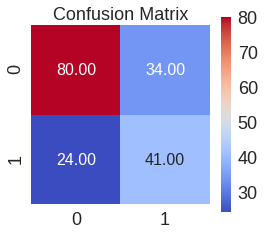

In [74]:
# ------------------------------------------------------------------------------------------
# Stochastic Gradient Descent
X_train, X_test, y_train, y_test = X_train_O.copy(), X_test_O.copy(), y_train_O.copy(), y_test_O.copy()
algo = 'Stochastic Gradient Descent'
print_variable_html(f'Modeling with ', f'{algo}')


modelBegin = time.clock()
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
y_hat = sgd.predict(X_test)
modelEnd = time.clock() 
runtime_sgd = (modelEnd - modelBegin) * 1000
print_variable_html(f'Accuracy = {acc_sgd} vs ', f'Runtime {runtime_sgd}ms')


xval_sgd = cross_val_score(sgd, X_train, y_train, cv=4)
print_variable_html('Cross validation score = ', f'{xval_sgd}')

cm_sgd = pd.DataFrame(confusion_matrix(y_test,y_hat))
plot_heat_map(cm_sgd, 'Confusion Matrix')
# ------------------------------------------------------------------------------------------

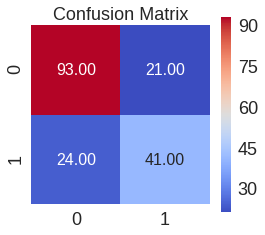

In [75]:
# ------------------------------------------------------------------------------------------
# Decision Tree

X_train, X_test, y_train, y_test = X_train_O.copy(), X_test_O.copy(), y_train_O.copy(), y_test_O.copy()
algo = 'Decision Tree'
print_variable_html(f'Modeling with ', f'{algo}')


modelBegin = time.clock()
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
y_hat = decision_tree.predict(X_test)
modelEnd = time.clock() 
runtime_decision_tree = (modelEnd - modelBegin) * 1000
print_variable_html(f'Accuracy = {acc_decision_tree} vs ', f'Runtime {runtime_decision_tree}ms')

xval_decision_tree = cross_val_score(decision_tree, X_train, y_train, cv=4)
print_variable_html('Cross validation score = ', f'{xval_decision_tree}')

cm_decision_tree = pd.DataFrame(confusion_matrix(y_test,y_hat))
plot_heat_map(cm_decision_tree, 'Confusion Matrix')
# ------------------------------------------------------------------------------------------

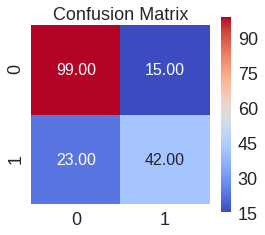

In [76]:

# ------------------------------------------------------------------------------------------
# Random Forest
X_train, X_test, y_train, y_test = X_train_O.copy(), X_test_O.copy(), y_train_O.copy(), y_test_O.copy()
algo = 'Random Forest'
print_variable_html(f'Modeling with ', f'{algo}')

modelBegin = time.clock()
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

y_hat = random_forest.predict(X_test)
modelEnd = time.clock() 
runtime_random_forest = (modelEnd - modelBegin) * 1000
print_variable_html(f'Accuracy = {acc_random_forest} vs ', f'Runtime {runtime_random_forest}ms')


xval_random_forest =cross_val_score(random_forest, X_train, y_train, cv=4)
print_variable_html('Cross validation score = ', f'{xval_random_forest}')

cm_random_forest = pd.DataFrame(confusion_matrix(y_test,y_hat))
plot_heat_map(cm_random_forest, 'Confusion Matrix')


# ------------------------------------------------------------------------------------------


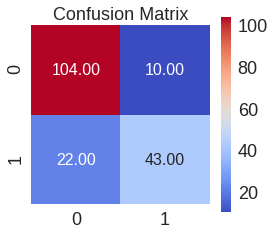

In [77]:
# ------------------------------------------------------------------------------------------
# XGBoost

X_train, X_test, y_train, y_test = X_train_O.copy(), X_test_O.copy(), y_train_O.copy(), y_test_O.copy()
algo = 'XGBoost'
print_variable_html(f'Modeling with ', f'{algo}')

modelEnd = time.clock
xgb = XGBClassifier(n_estimators=10, verbose=1)
xgb.fit(X_train, y_train)
Y_pred = xgb.predict(X_test)
xgb.score(X_train, y_train)
acc_xgb = round(xgb.score(X_train, y_train) * 100, 2)
y_hat = xgb.predict(X_test)
modelEnd = time.clock() 
runtime_xgb = (modelEnd - modelBegin) * 1000
print_variable_html(f'Accuracy = {acc_xgb} vs ', f'Runtime {runtime_xgb}ms')


xval_xgb =cross_val_score(xgb, X_train, y_train, cv=4)
print_variable_html('Cross validation score = ', f'{xval_xgb}')

cm_xgb = pd.DataFrame(confusion_matrix(y_test,y_hat))
plot_heat_map(cm_xgb, 'Confusion Matrix')
# ------------------------------------------------------------------------------------------

### ![Model Evaluation](https://i.supload.com/SkNPREwAp7.png)     

### <hr>

<hr>

#### <font color='blue'>Review the performance of the model trained for comparison</font>

In [78]:
# ------------------------------------------------------------------------------------------
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN3', 'KNN4', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'XG Boost'],
    'Score': [acc_svc, acc_knn3, acc_knn4, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree, acc_xgb],
    'Cross Validation' : [xval_svc, xval_knn3, xval_knn4, xval_log, 
              xval_random_forest, xval_gaussian, xval_perceptron, 
              xval_sgd, xval_linear_svc, xval_decision_tree, xval_xgb],
    'Runtime': [runtime_svc, runtime_knn3, runtime_knn4, runtime_log, 
                runtime_random_forest, runtime_gaussian, runtime_perceptron,
                runtime_sgd, runtime_linear_svc, runtime_decision_tree, runtime_xgb]}, 
    columns=['Model', 'Score', 'Cross Validation', 'Runtime'])


bestByScore = models.sort_values(by='Score', ascending=False)
bestByTime = models.sort_values(by='Runtime', ascending=True)

print_variable_html('Model performance by Score')
display(bestByScore)
print_variable_html('Model performance by Time')
display(bestByTime)

# ------------------------------------------------------------------------------------------


Model  Score  \
4                Random Forest  98.88   
9                Decision Tree  98.88   
0      Support Vector Machines  91.01   
10                    XG Boost  85.25   
1                         KNN3  83.85   
3          Logistic Regression  80.62   
2                         KNN4  78.65   
5                  Naive Bayes  77.95   
8                   Linear SVC  72.61   
7   Stochastic Gradient Decent  68.96   
6                   Perceptron  51.12   

                                     Cross Validation   Runtime  
4   [0.8100558659217877, 0.797752808988764, 0.8370...   299.992  
9   [0.7877094972067039, 0.7528089887640449, 0.797...     9.043  
0   [0.6983240223463687, 0.7078651685393258, 0.713...   106.709  
10  [0.7988826815642458, 0.7808988764044944, 0.831...  1453.477  
1   [0.7094972067039106, 0.7191011235955056, 0.685...    28.393  
3   [0.7653631284916201, 0.7584269662921348, 0.814...     9.297  
2   [0.6871508379888268, 0.6853932584269663, 0.696...    25.315  
5   [0.7486033519553073, 0.7303370786516854, 0.831...     9.084  
8   [0.7486033519553073, 0.7584269662921348, 0.691...   125.147  
7   [0.6927374301675978, 0.7415730337078652, 0.432...     9.728  
6   [0.6871508379888268, 0.6235955056179775, 0.612...     7.718

Model  Score  \
6                   Perceptron  51.12   
9                Decision Tree  98.88   
5                  Naive Bayes  77.95   
3          Logistic Regression  80.62   
7   Stochastic Gradient Decent  68.96   
2                         KNN4  78.65   
1                         KNN3  83.85   
0      Support Vector Machines  91.01   
8                   Linear SVC  72.61   
4                Random Forest  98.88   
10                    XG Boost  85.25   

                                     Cross Validation   Runtime  
6   [0.6871508379888268, 0.6235955056179775, 0.612...     7.718  
9   [0.7877094972067039, 0.7528089887640449, 0.797...     9.043  
5   [0.7486033519553073, 0.7303370786516854, 0.831...     9.084  
3   [0.7653631284916201, 0.7584269662921348, 0.814...     9.297  
7   [0.6927374301675978, 0.7415730337078652, 0.432...     9.728  
2   [0.6871508379888268, 0.6853932584269663, 0.696...    25.315  
1   [0.7094972067039106, 0.7191011235955056, 0.685...    28.393  
0   [0.6983240223463687, 0.7078651685393258, 0.713...   106.709  
8   [0.7486033519553073, 0.7584269662921348, 0.691...   125.147  
4   [0.8100558659217877, 0.797752808988764, 0.8370...   299.992  
10  [0.7988826815642458, 0.7808988764044944, 0.831...  1453.477

<font color='blue'>**2 models stand up with more than 90% score: Random Forest and Decision Tree.**</font>
<br>I wrote loop to look at them by scores and runtime and try to propose something that is better in both aspect.

In [79]:
# ------------------------------------------------------------------------------------------
p = 0
winner = 'none'
modelProposed = ''

for i in range(bestByScore.shape[0]):
    bestScores = bestByScore.iloc[0:i,:]
#    print(f'bestScores {bestByScore.iloc[p,:]} {bestScores}')
    bestTimes = bestByTime.iloc[0:i,:]
#    print(f'bestTimes {bestByScore.iloc[p,:]} {bestTimes}')
    bestOfBoth = pd.DataFrame(bestScores.append(bestTimes))
#    display(bestOfBoth)
    bestOfBothCounts = bestOfBoth.groupby('Model').count()
#    display(bestOfBothCounts)
    weHaveAWinner = bestOfBothCounts['Score']>1
    potentialModel = bestOfBothCounts[bestOfBothCounts['Score']>1]
    noOfModel = potentialModel.shape[0]
    if noOfModel>0:
        modelProposed = potentialModel
        modelList = []
        for model in modelProposed.index:
            modelList.append(model)
        if winner=='none':
            winner = modelList
    p += 1
    
if winner=='none':
    print_variable_html('Sorry, cannot proposed any model.', f'You have to decide Score or Runtime is more important.')
else:
    print_variable_html('Model Proposed looking at Score and Runtime is ', f'{winner}')
    for w in winner:
        bestByScore[bestByScore['Model']==w]       
        # train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
    
print_variable_html('Review Model performance by Score and Runtime. ', 'Also please check for overfitting')
display(bestByScore)
# ------------------------------------------------------------------------------------------


Model  Score  \
4                Random Forest  98.88   
9                Decision Tree  98.88   
0      Support Vector Machines  91.01   
10                    XG Boost  85.25   
1                         KNN3  83.85   
3          Logistic Regression  80.62   
2                         KNN4  78.65   
5                  Naive Bayes  77.95   
8                   Linear SVC  72.61   
7   Stochastic Gradient Decent  68.96   
6                   Perceptron  51.12   

                                     Cross Validation   Runtime  
4   [0.8100558659217877, 0.797752808988764, 0.8370...   299.992  
9   [0.7877094972067039, 0.7528089887640449, 0.797...     9.043  
0   [0.6983240223463687, 0.7078651685393258, 0.713...   106.709  
10  [0.7988826815642458, 0.7808988764044944, 0.831...  1453.477  
1   [0.7094972067039106, 0.7191011235955056, 0.685...    28.393  
3   [0.7653631284916201, 0.7584269662921348, 0.814...     9.297  
2   [0.6871508379888268, 0.6853932584269663, 0.696...    25.315  
5   [0.7486033519553073, 0.7303370786516854, 0.831...     9.084  
8   [0.7486033519553073, 0.7584269662921348, 0.691...   125.147  
7   [0.6927374301675978, 0.7415730337078652, 0.432...     9.728  
6   [0.6871508379888268, 0.6235955056179775, 0.612...     7.718

#### ![Conclusion](https://i.supload.com/HyBDCVvAp7.png)

<hr>

#### <font color='blue'>Final Decision: </font>**XG Boost**
It did not work out to be the best accuracy but it seem to have less overfitting (looking at the cross validation) compared 2 other models with the best scores which are Random and Decision Tree. Therefore, saved the XGBoost model.

In [0]:
# ------------------------------------------------------------------------------------------
# Save the trained model using pickle 
# import pickle
# s = pickle.dumps(xgb)
# pickle.dump( xgb, open( "titanic_xgb_trained_model.p", "wb" ) )
# titanic_xgb_trained = pickle.load( open( "titanic_xgb_trained_model.p", "rb" ) )

# Alternatively, we can save the trained model clf with sklearn joblib
joblib.dump(xgb, 'titanic_xgb_trained_model.pkl') 


titanic_xgb_trained = joblib.load('titanic_xgb_trained_model.pkl')
Y_pred = titanic_xgb_trained.predict(titanicTestdf)
# ------------------------------------------------------------------------------------------

<hr>

#### <font color='blue'> Get output file for Test set?</font>

In [81]:
submission = pd.DataFrame({
        "PassengerId": titanicTest["PassengerId"],     #X_test
        "Survived": Y_pred
    })
submission.to_csv('submission.csv', index=False)


downloadCSV = get_yes_no_condition("Do you want to download submission.csv")
if downloadCSV:
    from google.colab import files
    files.download('submission.csv')
# ------------------------------------------------------------------------------------------


Do you want to download submission.csv, (Y/N) Press [Enter] for N? 


<hr>

#### <font color='blue'>Kaggle Submission</font>
This was from the 2nd submission after I amended the program a bit. 
![https://i.supload.com/rkhVTq8yN.png](https://i.supload.com/rkhVTq8yN.png)


![Separator](https://i.supload.com/H1SAcsx14.png)

<hr>

# <font color='blue'>Part B</font>
![Facebook Metrics Predictor](https://i.supload.com/HklT8ZDiC7.jpg)

In [0]:
# -----------------------------------------------------------------------------------------------------------------------    
# Other setting for Part B
snsPalette = 'Blues'
# -----------------------------------------------------------------------------------------------------------------------    

#### ![Load Data](https://i.supload.com/HyhegKATm.png)     

In [83]:
# -----------------------------------------------------------------------------------------------------------------------    
# Read data file and sample
fbdata = pd.read_csv(fbMetricsDataUrl,sep=";")
fbread = fbdata.copy()
df_sample(fbdata, 4)
# -----------------------------------------------------------------------------------------------------------------------    

Page total likes   Type  Category  Post Month  Post Weekday  Post Hour  \
249            129600  Photo         2           7             7         11   
280            126345  Photo         2           6             1         12   
283            126141  Photo         1           6             7          4   
290            125612  Photo         1           6             4          7   

     Paid  Lifetime Post Total Reach  Lifetime Post Total Impressions  \
249   1.0                       2602                             4349   
280   0.0                       3212                             4908   
283   1.0                       9652                            16968   
290   0.0                       1729                             3289   

     Lifetime Engaged Users  Lifetime Post Consumers  \
249                     479                      444   
280                     735                      720   
283                    1400                     1381   
290                     596                      591   

     Lifetime Post Consumptions  \
249                         588   
280                         897   
283                        2801   
290                         735   

     Lifetime Post Impressions by people who have liked your Page  \
249                                               3342              
280                                               3399              
283                                              15917              
290                                               2888              

     Lifetime Post reach by people who like your Page  \
249                                              1946   
280                                              2162   
283                                              8972   
290                                              1406   

     Lifetime People who have liked your Page and engaged with your post  \
249                                                287                     
280                                                375                     
283                                               1035                     
290                                                340                     

     comment  like  share  Total Interactions  
249        1  53.0   14.0                  68  
280        1  40.0    8.0                  49  
283        1  34.0    4.0                  39  
290        0  23.0    2.0                  25

#### ![Exploratory Data Analysis](https://i.supload.com/SJl2xltRpX.png)


In [84]:
# ------------------------------------------------------------------------------------------
# Review dictionary keys
# dataColumns = pd.DataFrame(fbdata.keys())
# display(dictframe)
dataColumns = pd.DataFrame(fbdata.dtypes, columns=['Type'])
display(dataColumns)
# ------------------------------------------------------------------------------------------


Type
Page total likes                                      int64
Type                                                 object
Category                                              int64
Post Month                                            int64
Post Weekday                                          int64
Post Hour                                             int64
Paid                                                float64
Lifetime Post Total Reach                             int64
Lifetime Post Total Impressions                       int64
Lifetime Engaged Users                                int64
Lifetime Post Consumers                               int64
Lifetime Post Consumptions                            int64
Lifetime Post Impressions by people who have li...    int64
Lifetime Post reach by people who like your Page      int64
Lifetime People who have liked your Page and en...    int64
comment                                               int64
like                                                float64
share                                               float64
Total Interactions                                    int64

In [85]:
# ------------------------------------------------------------------------------------------
# Review dataset statistical information

noOfRows, noOfCols = fbdata.shape
print_variable_html(f'The dataset has ', f'{noOfRows} rows and these {noOfCols} columns')
display(fbdata.describe(include='all').append(fbdata.isnull().sum().rename('isnull')))
print_variable_html(fbdata.index, '')
# ------------------------------------------------------------------------------------------

Page total likes   Type    Category  Post Month  Post Weekday  \
count         500.000000    500  500.000000  500.000000    500.000000   
unique               NaN      4         NaN         NaN           NaN   
top                  NaN  Photo         NaN         NaN           NaN   
freq                 NaN    426         NaN         NaN           NaN   
mean       123194.176000    NaN    1.880000    7.038000      4.150000   
std         16272.813214    NaN    0.852675    3.307936      2.030701   
min         81370.000000    NaN    1.000000    1.000000      1.000000   
25%        112676.000000    NaN    1.000000    4.000000      2.000000   
50%        129600.000000    NaN    2.000000    7.000000      4.000000   
75%        136393.000000    NaN    3.000000   10.000000      6.000000   
max        139441.000000    NaN    3.000000   12.000000      7.000000   
isnull          0.000000      0    0.000000    0.000000      0.000000   

         Post Hour        Paid  Lifetime Post Total Reach  \
count   500.000000  499.000000                  500.00000   
unique         NaN         NaN                        NaN   
top            NaN         NaN                        NaN   
freq           NaN         NaN                        NaN   
mean      7.840000    0.278557                13903.36000   
std       4.368589    0.448739                22740.78789   
min       1.000000    0.000000                  238.00000   
25%       3.000000    0.000000                 3315.00000   
50%       9.000000    0.000000                 5281.00000   
75%      11.000000    1.000000                13168.00000   
max      23.000000    1.000000               180480.00000   
isnull    0.000000    1.000000                    0.00000   

        Lifetime Post Total Impressions  Lifetime Engaged Users  \
count                      5.000000e+02              500.000000   
unique                              NaN                     NaN   
top                                 NaN                     NaN   
freq                                NaN                     NaN   
mean                       2.958595e+04              920.344000   
std                        7.680325e+04              985.016636   
min                        5.700000e+02                9.000000   
25%                        5.694750e+03              393.750000   
50%                        9.051000e+03              625.500000   
75%                        2.208550e+04             1062.000000   
max                        1.110282e+06            11452.000000   
isnull                     0.000000e+00                0.000000   

        Lifetime Post Consumers  Lifetime Post Consumptions  \
count                500.000000                  500.000000   
unique                      NaN                         NaN   
top                         NaN                         NaN   
freq                        NaN                         NaN   
mean                 798.772000                 1415.130000   
std                  882.505013                 2000.594118   
min                    9.000000                    9.000000   
25%                  332.500000                  509.250000   
50%                  551.500000                  851.000000   
75%                  955.500000                 1463.000000   
max                11328.000000                19779.000000   
isnull                 0.000000                    0.000000   

        Lifetime Post Impressions by people who have liked your Page  \
count                                        5.000000e+02              
unique                                                NaN              
top                                                   NaN              
freq                                                  NaN              
mean                                         1.676638e+04              
std                                          5.979102e+04              
min                                          5.670000e+02           

In [86]:
# -----------------------------------------------------------------------------------------------------------------------
# See data skewness
print_variable_html('Data columns skewness', '')
display(fbdata.skew().sort_values(ascending=False))
print_line('-')

# List out all variables with nulls/missing values
print_variable_html('Note the columns of with missing values.')
missingValues = pd.DataFrame(fbdata.isnull().sum(), columns=['Count'])
columnsWithMissingValues = print(missingValues[missingValues['Count']>0])
display(columnsWithMissingValues)
# -----------------------------------------------------------------------------------------------------------------------


Lifetime Post Impressions by people who have liked your Page           14.723360
share                                                                  12.161379
comment                                                                11.767564
Total Interactions                                                      9.712906
like                                                                    8.955313
Lifetime Post Total Impressions                                         8.351008
Lifetime Post Consumers                                                 5.033075
Lifetime Post Consumptions                                              4.817636
Lifetime Engaged Users                                                  4.515920
Lifetime Post Total Reach                                               3.679156
Lifetime People who have liked your Page and engaged with your post     2.991649
Lifetime Post reach by people who like your Page                        2.609003
Paid                        

--------------------------------------------------------------------------------


       Count
Paid       1
like       1
share      4


None

<font color='blue'>**Observation: **</font>Very few columns missing data and no many missing data overall</font>

<hr> 

#### <font color='blue'>Corrrelation Review</font>


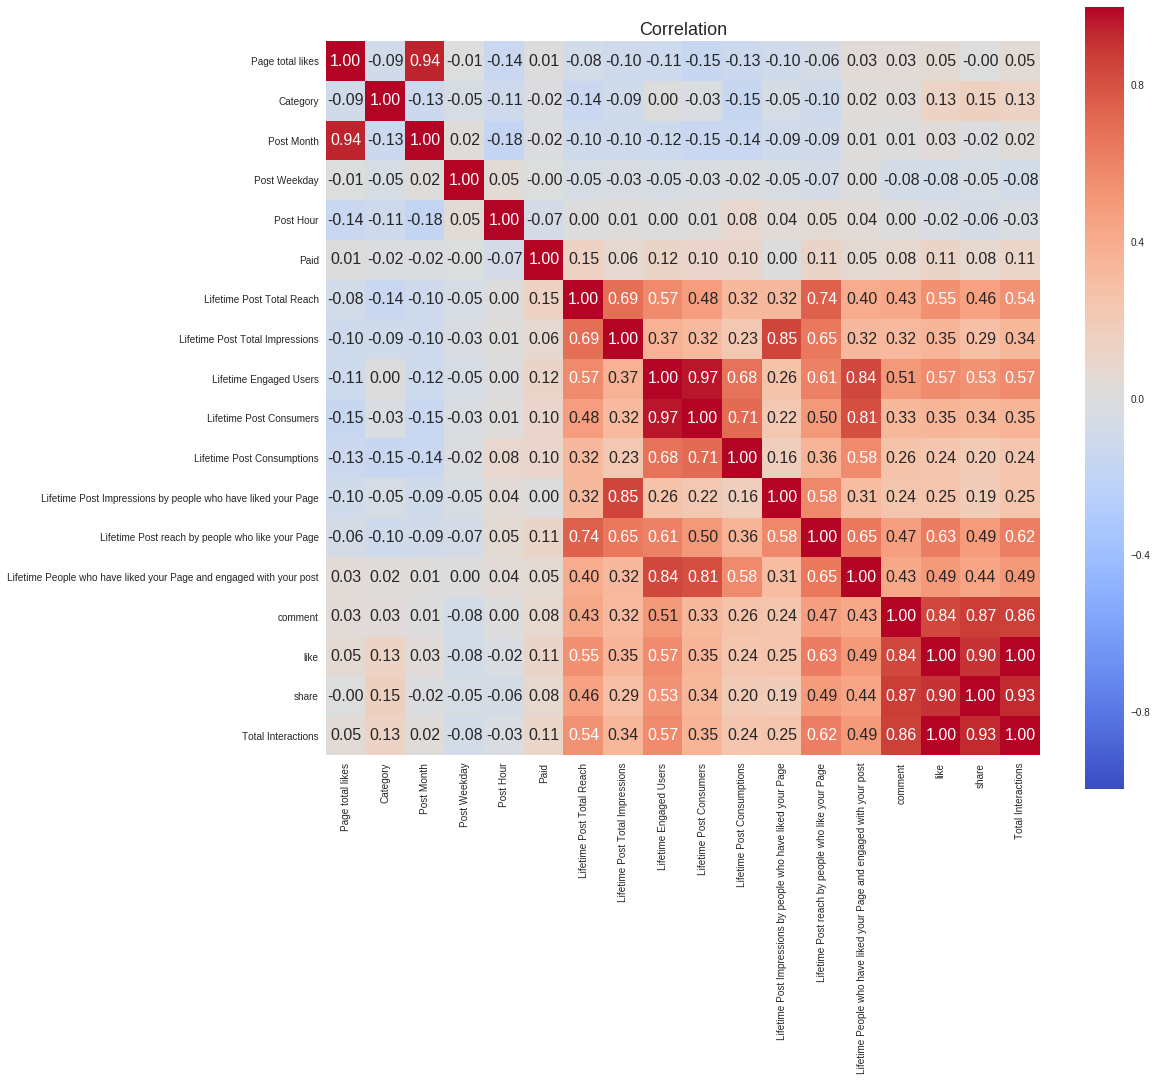

In [87]:
# ------------------------------------------------------------------------------------------            
print_variable_html('1st Look')
plot_correlation_map(fbdata)
# ------------------------------------------------------------------------------------------

<font color='blue'>**Observation: **</font>Varying degrees of correlation between features and different targets with some to a lesser degree.

<hr>

#### <font color='blue'>Checking on some columes with missing data</font>

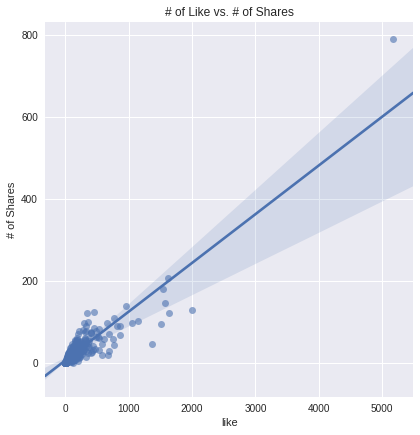

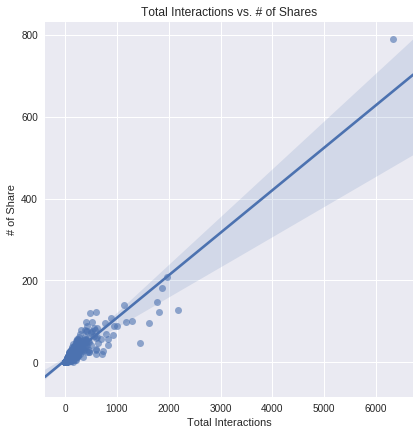

In [88]:
# ------------------------------------------------------------------------------------------            
print_variable_html('Look at 3 columns that are closely related a bit more')
sns.lmplot(x='like', y='share',
           data=fbdata, fit_reg=True,
          scatter_kws={'alpha':0.6},size=(6))
plt.ylabel("# of Shares")
plt.title('# of Like vs. # of Shares')

sns.lmplot(x='Total Interactions', y='share',
           data=fbdata, fit_reg=True,
          scatter_kws={'alpha':0.6},size=(6))
plt.ylabel("# of Share")
plt.title('Total Interactions vs. # of Shares')

plt.show()
# ------------------------------------------------------------------------------------------


#### <font color='blue'>Fill missng value for "Paid"</font>




In [89]:
# ------------------------------------------------------------------------------------------            
# Fill column ['Paid'] them with most frequent value
paidIsNull = fbdata['Paid'].isnull()
freq_paid = fbdata['Paid'].dropna().mode()[0]
fbdata['Paid'].fillna(freq_paid, inplace=True)
print_variable_html(f'Column ["Paid"] filled with most frequent value of "{freq_paid}"')
# ------------------------------------------------------------------------------------------            

#### <font color='blue'>Fill missng value for "like"</font>

In [90]:
# ------------------------------------------------------------------------------------------
likeIsNull = fbdata['like'].isnull()
fbdata[likeIsNull]
# ------------------------------------------------------------------------------------------


Page total likes   Type  Category  Post Month  Post Weekday  Post Hour  \
111            136736  Photo         1          10             6          8   

     Paid  Lifetime Post Total Reach  Lifetime Post Total Impressions  \
111   0.0                       1261                             2158   

     Lifetime Engaged Users  Lifetime Post Consumers  \
111                      37                       37   

     Lifetime Post Consumptions  \
111                          49   

     Lifetime Post Impressions by people who have liked your Page  \
111                                               1911              

     Lifetime Post reach by people who like your Page  \
111                                              1077   

     Lifetime People who have liked your Page and engaged with your post  \
111                                                 33                     

     comment  like  share  Total Interactions  
111        0   NaN    NaN                   0

**<font color='blue'>Cannot depent on ['share'] or ['Total Interactions'] which has high correlation to provide fill value. 
Doesn't make sense to fill with O because unlikely a post with so many page total likes has zero like in a post. ['like'] has high skewness, so fill with median.**</font>

In [91]:
# ------------------------------------------------------------------------------------------
like_median = fbdata['like'].median()
fbdata['like'].fillna(like_median, inplace=True) 
print_variable_html(f'Column ["like"] filled with most median value of "{like_median}"')

# ------------------------------------------------------------------------------------------


#### <font color='blue'>Fill missng value for "share"</font>

In [92]:
# ------------------------------------------------------------------------------------------
shareIsNull = fbdata['share'].isnull()
fbdata[shareIsNull]
# ------------------------------------------------------------------------------------------

Page total likes   Type  Category  Post Month  Post Weekday  Post Hour  \
111            136736  Photo         1          10             6          8   
120            136393  Photo         1          10             7          9   
124            136393  Photo         1          10             7          6   
164            135428  Photo         1           9             5         10   

     Paid  Lifetime Post Total Reach  Lifetime Post Total Impressions  \
111   0.0                       1261                             2158   
120   0.0                        584                             1029   
124   0.0                        677                             1285   
164   0.0                       1060                             2004   

     Lifetime Engaged Users  Lifetime Post Consumers  \
111                      37                       37   
120                     273                      271   
124                     251                      246   
164                     266                      251   

     Lifetime Post Consumptions  \
111                          49   
120                         308   
124                         297   
164                         337   

     Lifetime Post Impressions by people who have liked your Page  \
111                                               1911              
120                                                943              
124                                               1210              
164                                               1705              

     Lifetime Post reach by people who like your Page  \
111                                              1077   
120                                               511   
124                                               615   
164                                               870   

     Lifetime People who have liked your Page and engaged with your post  \
111                                                 33                     
120                                                232                     
124                                                211                     
164                                                204                     

     comment   like  share  Total Interactions  
111        0  101.0    NaN                   0  
120        0    2.0    NaN                   2  
124        0    7.0    NaN                   7  
164        0   18.0    NaN                  18

**<font color='blue'> Fill 'share' column missing using linear equation value with 'Total Interactions' column since they have high relation</font>**

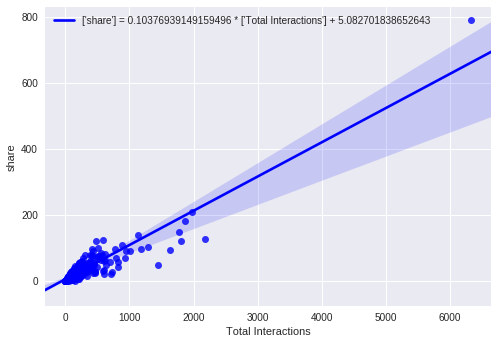

In [93]:
# ------------------------------------------------------------------------------------------            
# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(fbdata['Total Interactions'][~shareIsNull],fbdata['share'][~shareIsNull])
line_label = f"['share'] = {slope} * ['Total Interactions'] + {intercept}"

# use line_kws to set line label for legend
ax = sns.regplot(x="Total Interactions", y="share", data=fbdata[~shareIsNull], color='b', 
 line_kws={'label': line_label})

# plot legend
ax.legend()

plt.show()
print_variable_html(f"{line_label}")

plt.show()
# ------------------------------------------------------------------------------------------


In [94]:
# ------------------------------------------------------------------------------------------
fbdata['share'][shareIsNull] =  (slope * fbdata['Total Interactions'] + intercept).astype(int)
print_variable_html(f'Column ["share"] filled value = ( {slope} * ["Total Interactions"] + {intercept}')
fbdata.loc[[111, 120, 124, 164]]
# ------------------------------------------------------------------------------------------

Page total likes   Type  Category  Post Month  Post Weekday  Post Hour  \
111            136736  Photo         1          10             6          8   
120            136393  Photo         1          10             7          9   
124            136393  Photo         1          10             7          6   
164            135428  Photo         1           9             5         10   

     Paid  Lifetime Post Total Reach  Lifetime Post Total Impressions  \
111   0.0                       1261                             2158   
120   0.0                        584                             1029   
124   0.0                        677                             1285   
164   0.0                       1060                             2004   

     Lifetime Engaged Users  Lifetime Post Consumers  \
111                      37                       37   
120                     273                      271   
124                     251                      246   
164                     266                      251   

     Lifetime Post Consumptions  \
111                          49   
120                         308   
124                         297   
164                         337   

     Lifetime Post Impressions by people who have liked your Page  \
111                                               1911              
120                                                943              
124                                               1210              
164                                               1705              

     Lifetime Post reach by people who like your Page  \
111                                              1077   
120                                               511   
124                                               615   
164                                               870   

     Lifetime People who have liked your Page and engaged with your post  \
111                                                 33                     
120                                                232                     
124                                                211                     
164                                                204                     

     comment   like  share  Total Interactions  
111        0  101.0    5.0                   0  
120        0    2.0    5.0                   2  
124        0    7.0    5.0                   7  
164        0   18.0    6.0                  18

**<font color='blue'>Keep few columns to look at to predict and forget about the rest.</font>**

In [95]:
# ------------------------------------------------------------------------------------------
kiv_ref = {'Lifetime Post Total Reach': True, 
           'Lifetime Post Total Impressions': False, 
           'Lifetime Engaged Users': False,
           'Lifetime Post Consumers': False, 
           'Lifetime Post Consumptions': False,
           'Lifetime Post Impressions by people who have liked your Page': False,
           'Lifetime Post reach by people who like your Page': True,
           'Lifetime People who have liked your Page and engaged with your post': False,
           'comment': False, 
           'like':True, 
           'share': True, 
           'Total Interactions': True}

kiv_list = []
drop_list = []
for key, value in kiv_ref.items():
    if value:
        kiv_list.append(key)
    else:
        drop_list.append(key)
print(kiv_list)
print(drop_list)
# ------------------------------------------------------------------------------------------


['Lifetime Post Total Reach', 'Lifetime Post reach by people who like your Page', 'like', 'share', 'Total Interactions']
['Lifetime Post Total Impressions', 'Lifetime Engaged Users', 'Lifetime Post Consumers', 'Lifetime Post Consumptions', 'Lifetime Post Impressions by people who have liked your Page', 'Lifetime People who have liked your Page and engaged with your post', 'comment']


#### <font color='blue'>Reivew Numeric and Non-Numeric columns</font>


In [96]:
# ------------------------------------------------------------------------------------------
# Get list of numeric and non-numeric variables
numvars = list(fbdata.columns[fbdata.dtypes != 'object'])
nonnumvars  = list(fbdata.columns[fbdata.dtypes == 'object'])

numAuxVerb = 's are' if (len(numvars)>1) else ' is'
print_variable_html (f'Numeric column{numAuxVerb} ', f'{numvars}') 

nonNumAuxVerb = 's are' if (len(nonnumvars)>1) else ' is'
print_variable_html (f'Non-numeric column{nonNumAuxVerb} ', f'{nonnumvars}') 

# ------------------------------------------------------------------------------------------

In [97]:
# ------------------------------------------------------------------------------------------
# Do some further exploration on list to get list of features used
numfeats = numvars
numAuxVerb = 's are' if (len(numfeats)>1) else ' is'
print_variable_html (f'Numeric feature{numAuxVerb} ', f'{numfeats}') 

nonnumfeats = nonnumvars
nonNumAuxVerb = 's are' if (len(nonnumvars)>1) else ' is'
print_variable_html (f'Non-numeric feature{nonNumAuxVerb} ', f'{nonnumfeats}') 
# ------------------------------------------------------------------------------------------


<hr>

#### <font color='blue'>Set target = 'Lifetime Post reach by people who like your Page' </font>
------------------------------------------------------------------------------------------


In [0]:
# ------------------------------------------------------------------------------------------
# Try this 
target = 'Lifetime Post reach by people who like your Page' 
# ------------------------------------------------------------------------------------------


<hr>

#### <font color='blue'>Review non-numeric columns. </font>
* **Note**: Column name ending with ID is skipped. 


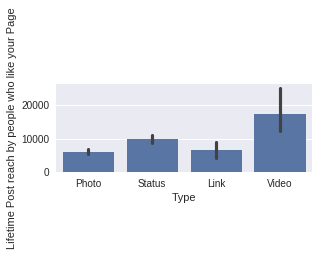

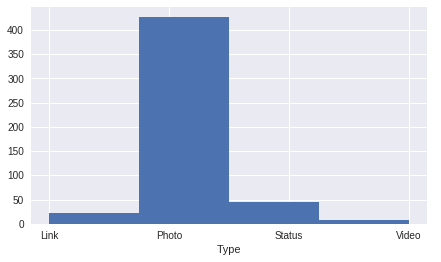

--------------------------------------------------------------------------------


In [99]:
# -----------------------------------------------------------------------------------------------------------------------
# pd.options.display.float_format = '{:.2f}%'.format
print_variable_html(f'Reviewing non-numerics...')
for col in nonnumfeats:
    nullColCount = fbdata[col].isnull().sum()
    nonNullColCount = fbdata[col].count()
    ucount = (fbdata[col].nunique())
    print_variable_html(f'Column ["{col}"] has {nonNullColCount} not null values, {nullColCount} null values and {ucount} unique values.')
    
    # List values for the column less than 10 unique values
        
    if (col[-2:].upper()!='ID'):
        nullColCount = fbdata[col].isnull().sum()
        nonNullColCount = fbdata[col].count()
        ucount = (fbdata[col].nunique())
        
        if ucount>2:
            noOfBins = min(ucount,9)
        else:
            noOfBins = 2

        print_variable_html(f'Looking at target ["{target}"] by {col}')            
        categoryOrder = fbdata[col].unique()
        plot_categories( fbdata , col, target, order=categoryOrder)    
        plt.show() 

        print_variable_html(f'Distribution of column {col}')            
        g = sns.FacetGrid(fbdata, 
            size=3.8, aspect=1.6, 
            palette=snsPalette
            )
        g.map(plt.hist, col, bins=noOfBins)
        g.add_legend()
        plt.show()
                    
    else:
        print_variable_html(f'Not plotting for ID Columun {col}')
    print_line('-')    
# -----------------------------------------------------------------------------------------------------------------------

**<font color='blue'>Most posts are photos and least are videos  and the the number of photo posts is lots more than those other type of posts.  Yet, it is the video posts that garner more 'likes'    **</font>

<hr>

#### <font color='blue'>Review numeric columns. </font>
* **Note**: Column name ending with ID is skipped.


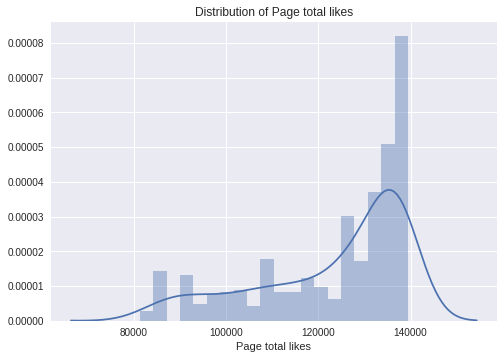

--------------------------------------------------------------------------------


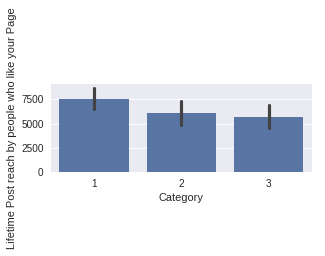

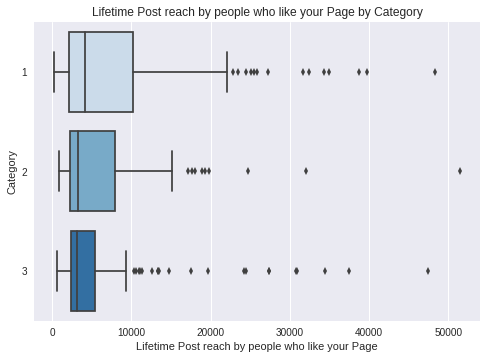

palette = Blues


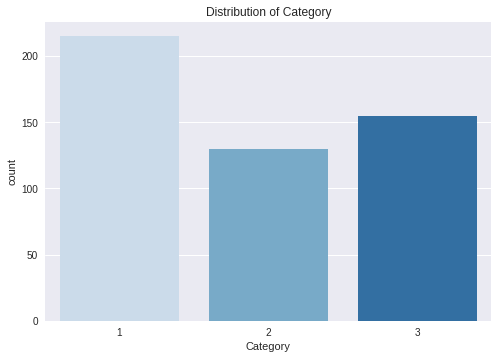

--------------------------------------------------------------------------------


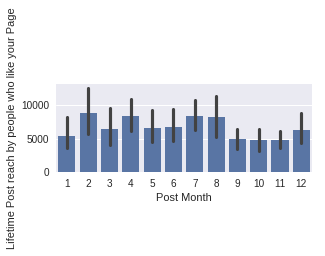

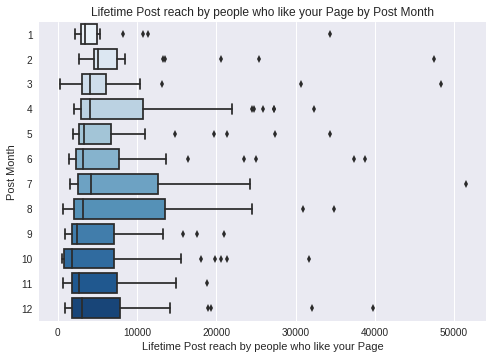

palette = Blues


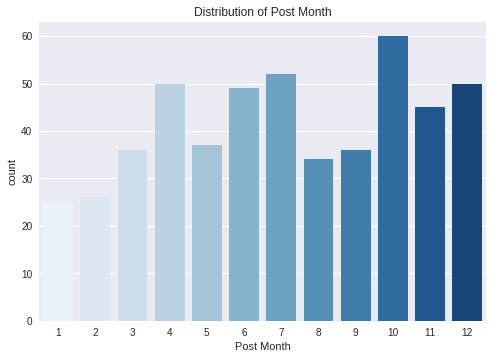

--------------------------------------------------------------------------------


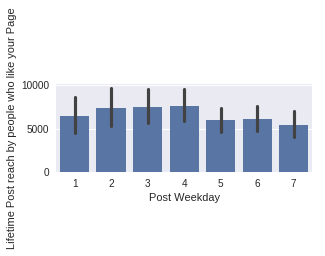

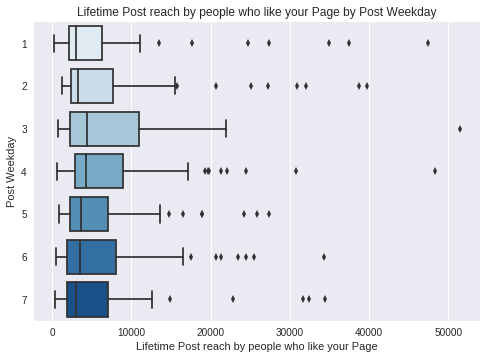

palette = Blues


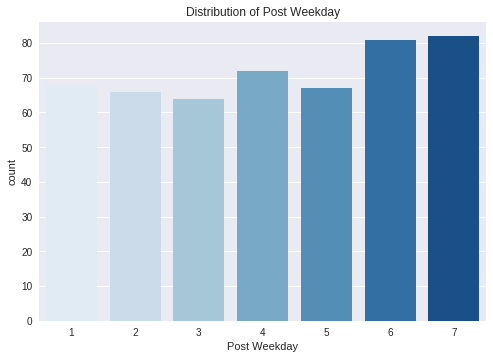

--------------------------------------------------------------------------------


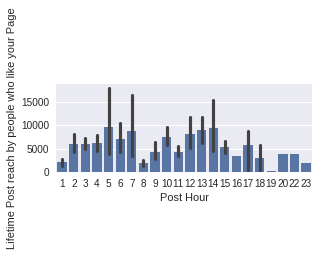

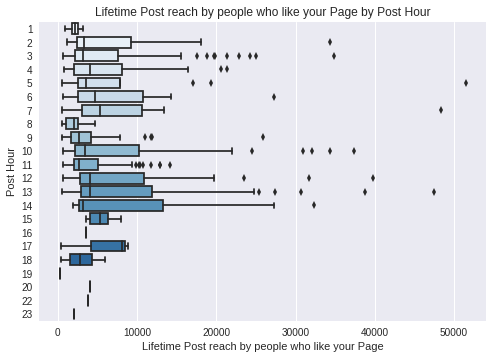

palette = Blues


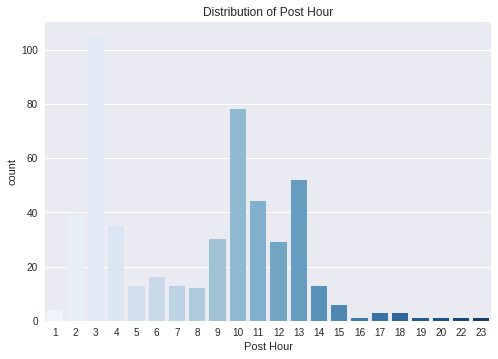

--------------------------------------------------------------------------------


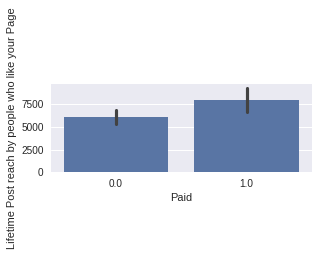

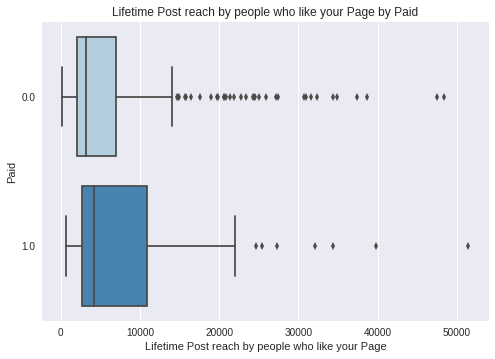

palette = Blues


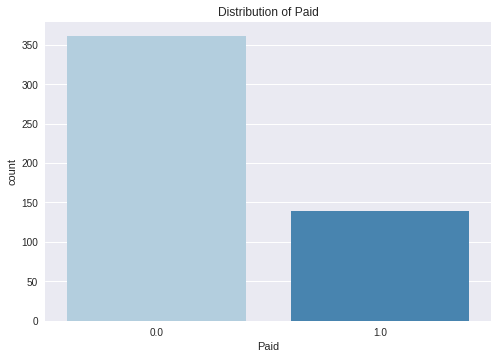

--------------------------------------------------------------------------------


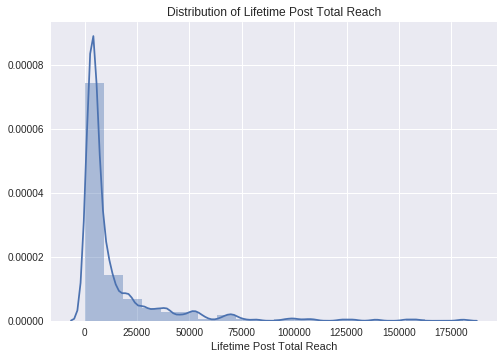

--------------------------------------------------------------------------------


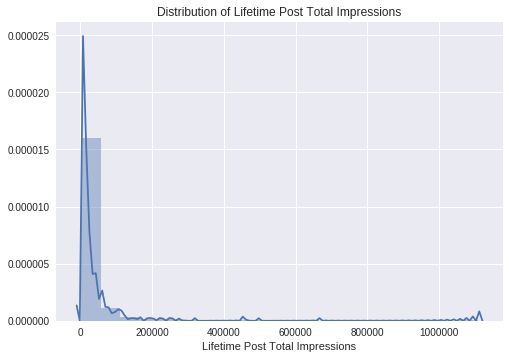

--------------------------------------------------------------------------------


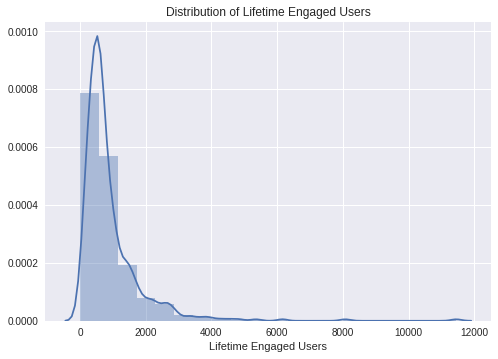

--------------------------------------------------------------------------------


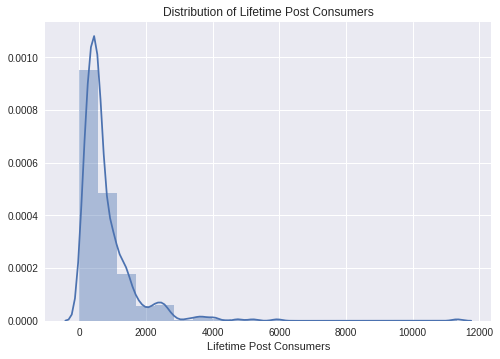

--------------------------------------------------------------------------------


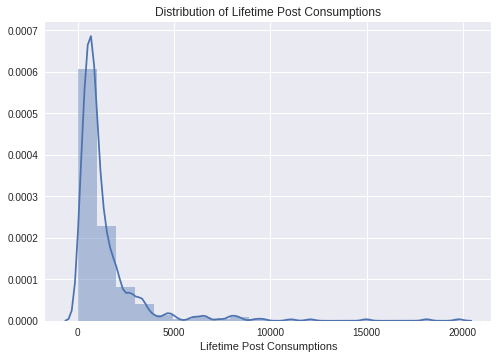

--------------------------------------------------------------------------------


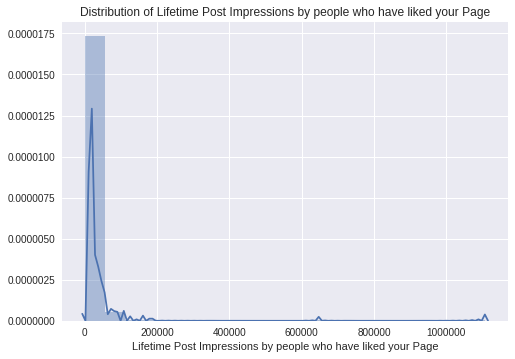

--------------------------------------------------------------------------------


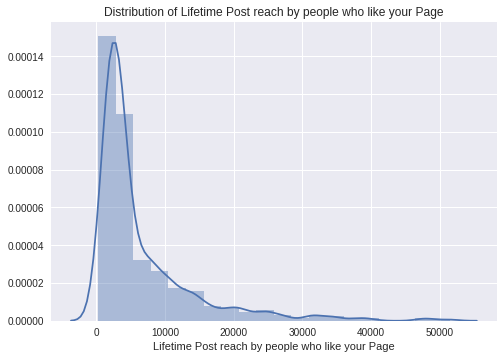

--------------------------------------------------------------------------------


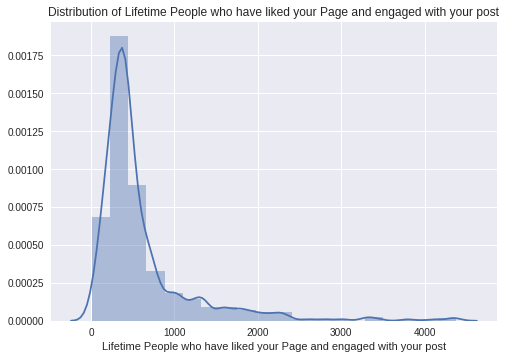

--------------------------------------------------------------------------------


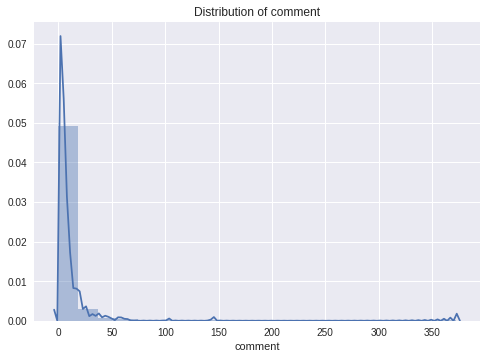

--------------------------------------------------------------------------------


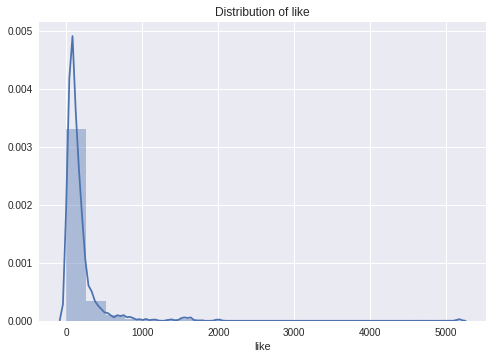

--------------------------------------------------------------------------------


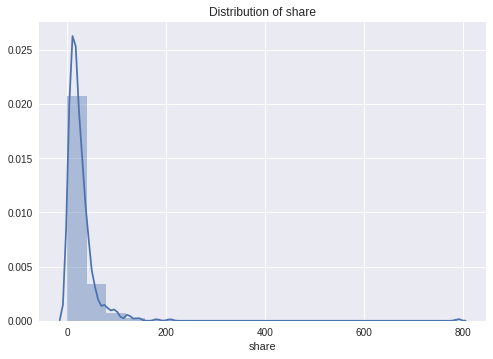

--------------------------------------------------------------------------------


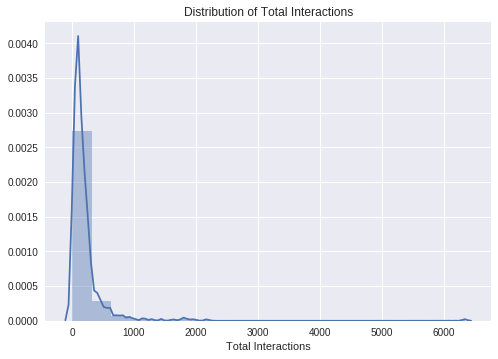

--------------------------------------------------------------------------------


In [100]:
# -----------------------------------------------------------------------------------------------------------------------
print_variable_html(f'Reviewing numerics...')
for col in numfeats:  # pppppppppppp
    nullColCount = fbdata[col].isnull().sum()
    nonNullColCount = fbdata[col].count()
    ucount = (fbdata[col].nunique())
    print_variable_html(f'Column ["{col}"] has {nonNullColCount} not null values, {nullColCount} null values and {ucount} unique values.')
    
    
    nullCount = fbdata[col].isnull().sum() 
    listOfValues = fbdata[col].unique()

   
    if (col[-2:]!='ID'):
        nullColCount = fbdata[col].isnull().sum()
        nonNullColCount = fbdata[col].count()
        ucount = (fbdata[col].nunique())
        
        # xxxxx
        colMean = round(fbdata[col].mean(), 2)
        colMedian = round(fbdata[col].median(), 2)
        colMode = fbdata.loc[:, col].mode()[0]
        if ucount>2:
            print_variable_html(f'Mean = {colMean}, Median = {colMedian}, First Mode = {colMode},  Filled values={nonNullColCount}, Null Values={nullColCount}')
            noOfBins = min(ucount,9)
        else:
            noOfBins = 2

            
        if ucount<25:
            print_variable_html(f'Looking at target ["{target}"] by {col}')            
            categoryOrder = fbdata[col].unique().sort()    
            plot_categories( fbdata , col, target, order=categoryOrder)    
            plt.show() 


            print_variable_html(f'Looking at target ["{target}"] by {col}')            
            sns.boxplot(x=fbdata[target],
                        y=fbdata[col],
                        orient='h',
                        palette=snsPalette)
            plt.title(f'{target} by {col}')
            plt.show() ### """            

            ref_violin_plot = """comment out and use box plot instead of violin plot 
            print_variable_html(f'Looking at target ["{target}"] by {col}')            
            vplotsize = (12,8)
            bplot = sns.violinplot(x = fbdata[target], 
                                   y = fbdata[col], 
                                   data=fbdata, 
                                   orient='h',
                                   palette=snsPalette)
            sns.set(rc={'figure.figsize':(vplotsize)})

        #    plt.title({xIn}, fontsize=16)
        #    plt.xlabel(xIn, fontsize=11)
        #    plt.ylabel(yIn, fontsize=11)
            plt.show() ### """            
            # -----------------------------------------------------------------------------------------------------------------------
            
            
            print_variable_html(f'Distribution of column ["{col}"]')            
            print(f'palette = {snsPalette}')
            sns.countplot(fbdata[col], palette=snsPalette)
            plt.title(f"Distribution of {col}")
            plt.show()
        else:

            print_variable_html(f'Distribution of column ["{col}"]')            
            sns.distplot(fbdata[col],bins=20)
            plt.title(f"Distribution of {col}")
            plt.show()

    
    
    else:
        print_variable_html(f'Not plotting for ID Columun ["{col}"]')

    print_line('-') 
# -----------------------------------------------------------------------------------------------------------------------



<font color='blue'>**Observations: **</font> 
* The target has some outliers which are seen the boxplots and distribution plots. 
* The targets column are skewed and some much more so than other.
* The target and other possible target columns are also highly skewed. 
* Hard to decide which features are important.
    * It looks like Category does matter. 
    * The "Total Interactions " vs "Post Weekday" seems to have some pattern but it could a a timeshift effect from the "Post Weekday".  
    * Certainly, "Post Hour" seem to have 2 peaks which are about 8 hours apart.    


** Whether post is paid or not has little difference on the number of 'likes'

#### ![Data Wrangle & Data Cleaning](https://i.supload.com/Hyb2gxtCTQ.png)     

In [101]:
# ------------------------------------------------------------------------------------------
# Remove the columns not wanting to look at first
fbdata.drop(columns=drop_list, inplace=True)
df_sample(fbdata,4)
# ------------------------------------------------------------------------------------------

Page total likes    Type  Category  Post Month  Post Weekday  Post Hour  \
25             138458  Status         2          12             6          3   
41             138895    Link         1          12             6          3   
247            129600   Photo         2           7             1         12   
328            120050   Photo         3           5             4         12   

     Paid  Lifetime Post Total Reach  \
25    0.0                       8284   
41    1.0                      18480   
247   0.0                       3460   
328   0.0                      39040   

     Lifetime Post reach by people who like your Page   like  share  \
25                                               5372   88.0   18.0   
41                                               6752  187.0   18.0   
247                                              2260   96.0   19.0   
328                                             19712  617.0   58.0   

     Total Interactions  
25                  106  
41                  211  
247                 115  
328                 691

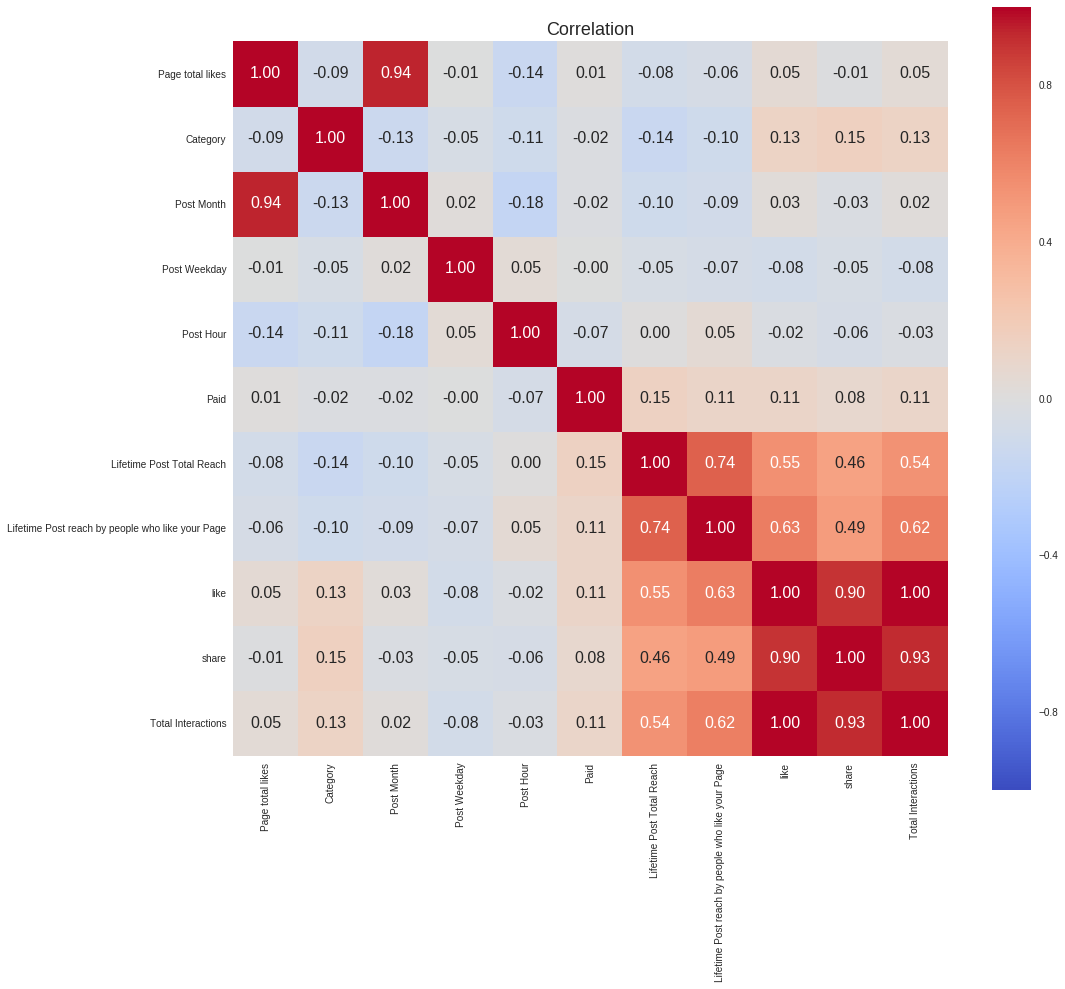

In [102]:
# ------------------------------------------------------------------------------------------
plot_correlation_map(fbdata)
# ------------------------------------------------------------------------------------------


In [103]:
# ------------------------------------------------------------------------------------------
df_sample(fbdata,4)
# ------------------------------------------------------------------------------------------

Page total likes   Type  Category  Post Month  Post Weekday  Post Hour  \
63             138185  Photo         1          11             2          3   
73             137893  Photo         1          11             4          2   
81             137177  Photo         3          11             6         10   
383            109670  Photo         3           4             6          3   

     Paid  Lifetime Post Total Reach  \
63    1.0                      27216   
73    1.0                      11444   
81    0.0                       5990   
383   0.0                       4986   

     Lifetime Post reach by people who like your Page   like  share  \
63                                               7760  219.0   22.0   
73                                               4320  172.0   47.0   
81                                               2628  370.0   53.0   
383                                              3230   92.0   28.0   

     Total Interactions  
63                  245  
73                  233  
81                  441  
383                 122

In [104]:
# ------------------------------------------------------------------------------------------
# Let choose a target variable
targets = fbdata.columns[7:] 
for output in targets:
    outcol = [output]
    feats = ['Page total likes', 
            'Type',
            'Category',
            'Post Month', 
            'Post Weekday', 
            'Post Hour',
            'Paid']
    cols = feats + outcol
    df = fbdata[cols]
    
    corr = df.corr()
    corr.sort_values([output], ascending = False, inplace = True)
    print(corr[output])
    print()

# ------------------------------------------------------------------------------------------


Lifetime Post Total Reach    1.000000
Paid                         0.147080
Post Hour                    0.003338
Post Weekday                -0.050155
Page total likes            -0.083245
Post Month                  -0.102506
Category                    -0.142073
Name: Lifetime Post Total Reach, dtype: float64

Lifetime Post reach by people who like your Page    1.000000
Paid                                                0.110675
Post Hour                                           0.052412
Page total likes                                   -0.060516
Post Weekday                                       -0.068741
Post Month                                         -0.092012
Category                                           -0.104456
Name: Lifetime Post reach by people who like your Page, dtype: float64

like                1.000000
Category            0.127136
Paid                0.111226
Page total likes    0.052839
Post Month          0.025184
Post Hour          -0.024540
Post Weekday

<hr>

#### <font color='blue'> Confirm target = 'Lifetime Post reach by people who like your Page'</font>


In [0]:
# ------------------------------------------------------------------------------------------
# Confirm target to predict
target = 'Lifetime Post reach by people who like your Page'
# ------------------------------------------------------------------------------------------

# Choose one of the columns in fbdata to be target
# cols = feats + [fbdata.columns[7]]


<hr>

#### <font color='blue'>**Remove outliers**</font>
Outliers then to mess up regression. 
Cut away. How much? One or 2 may be too little. 
Is 10% too much? Maybe not but I decided with go the 5% as mentioned in the paper by _Moro, S., et al., Predicting social media performance metrics and evaluation of the impact on brand building: A data mining approach, Journal of Business Research (2016), [http://dx.doi.org/10.1016/j.jbusres.2016.02.010](http://dx.doi.org/10.1016/j.jbusres.2016.02.010)_

In [106]:
# ------------------------------------------------------------------------------------------
cutpercent = 5
cutpercentvalue = np.percentile(fbdata[target], 100-cutpercent)
cutpercentCount = fbdata[target][fbdata[target]>cutpercentvalue].count()
print_variable_html(f'Cutoff {cutpercent}% will remove {cutpercentCount} rows', f' where ["{target}"] >{cutpercentvalue}')
# ------------------------------------------------------------------------------------------

In [107]:
# ------------------------------------------------------------------------------------------
fbMinusOutliers = fbdata[fbdata[target]<=cutpercentvalue].copy()
df_sample(fbMinusOutliers, 4)
# ------------------------------------------------------------------------------------------

Page total likes   Type  Category  Post Month  Post Weekday  Post Hour  \
130            136393  Photo         1          10             6         11   
189            133679  Photo         2           9             2         10   
321            123047  Photo         3           6             2         13   
464             92079  Photo         1           2             6         13   

     Paid  Lifetime Post Total Reach  \
130   0.0                        910   
189   0.0                       3100   
321   0.0                       3418   
464   0.0                     158208   

     Lifetime Post reach by people who like your Page   like  share  \
130                                               782    8.0    2.0   
189                                              2274  146.0   15.0   
321                                              2620   51.0    6.0   
464                                             20608  268.0   36.0   

     Total Interactions  
130                  10  
189                 164  
321                  59  
464                 313

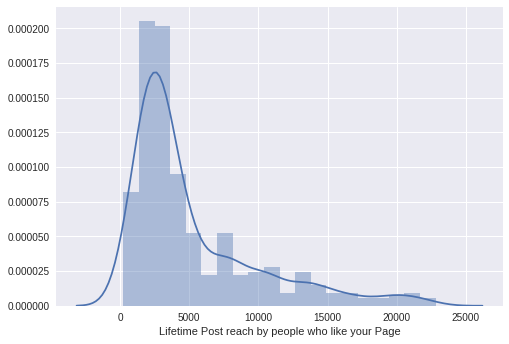

In [108]:
# ------------------------------------------------------------------------------------------           
sns.distplot(fbMinusOutliers[target],bins=20)
# ------------------------------------------------------------------------------------------

**<font color='blue'>Still skewed although some improvement from before.</font> **


<font color='blue'>**Looking at Target vs Post Weekday**</font>

In [0]:
# ------------------------------------------------------------------------------------------
# for if target is "like"
# like = 0 don't make sense. so make them 1 ===== 
# fbMinusOutliers.loc[fbMinusOutliers['like']==0, 'like'] = 1
#.loc[titanicTrainAgeFilledData['Age'].isnull(), 'Age'] = int(ageMaleMedianAfter)
# ------------------------------------------------------------------------------------------

Text(0,0.5,'# of Likes')

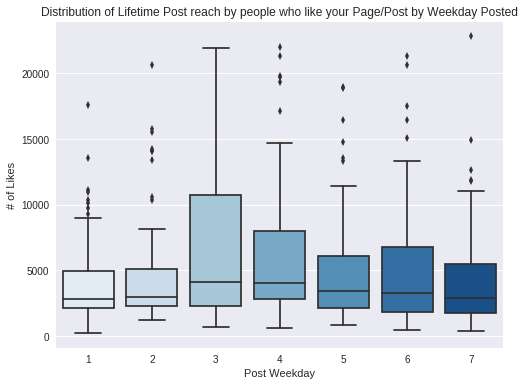

In [110]:
# ------------------------------------------------------------------------------------------
plt.figure(figsize=(8,6))
sns.boxplot(x='Post Weekday',y=target,data=fbMinusOutliers,palette=snsPalette)
plt.title(f"Distribution of {target}/Post by Weekday Posted")
plt.ylabel("# of Likes")
# ------------------------------------------------------------------------------------------

<hr>

<font color='blue'>**Thoughts: **</font>
because I think the social media activities are habits driven and are different on different day of the week, I am creating new feature (**PostDayHour**) combining **'Post Weekday'** and **'Post Hour'**

In [111]:
# ------------------------------------------------------------------------------------------
fbMinusOutliers.insert(7, 'PostDayHour', (fbMinusOutliers['Post Weekday']*100) + fbMinusOutliers['Post Hour'])

df_sample(fbMinusOutliers,4)
# ------------------------------------------------------------------------------------------


Page total likes   Type  Category  Post Month  Post Weekday  Post Hour  \
204            132817  Photo         3           8             2          3   
236            131300  Photo         3           7             7          4   
310            124940  Photo         1           6             1         13   
332            119198  Photo         3           5             2         12   

     Paid  PostDayHour  Lifetime Post Total Reach  \
204   0.0          203                       3358   
236   0.0          704                      10888   
310   0.0          113                       4452   
332   0.0          212                       2718   

     Lifetime Post reach by people who like your Page   like  share  \
204                                              2426  114.0   16.0   
236                                              8048  237.0   45.0   
310                                              3768   22.0    3.0   
332                                              1992   50.0   10.0   

     Total Interactions  
204                 132  
236                 294  
310                  25  
332                  60

#### Remove the columns used to create the new column PostDayHour

In [112]:
# ------------------------------------------------------------------------------------------
# Remove the columns used to create the new column PostDayHour
fbMinusOutliers.drop(columns=['Post Weekday', 'Post Hour'], inplace=True)
df_sample(fbMinusOutliers,4)
# ------------------------------------------------------------------------------------------


Page total likes    Type  Category  Post Month  Paid  PostDayHour  \
285            126141  Status         2           6   0.0          604   
287            126141   Photo         1           6   1.0          422   
328            120050   Photo         3           5   0.0          412   
496             81370   Photo         2           1   0.0          508   

     Lifetime Post Total Reach  \
285                       8628   
287                      20560   
328                      39040   
496                       3480   

     Lifetime Post reach by people who like your Page   like  share  \
285                                              6796   72.0   18.0   
287                                              3856  102.0    9.0   
328                                             19712  617.0   58.0   
496                                              2104   53.0   22.0   

     Total Interactions  
285                  94  
287                 125  
328                 691  
496                  75

** Make oridinal columns from "Type" column.**

In [113]:
# ------------------------------------------------------------------------------------------
fbMinusOutliers = pd.get_dummies(fbMinusOutliers,columns=['Type'])
df_sample(fbMinusOutliers,4)

display(fbMinusOutliers.describe(include='all').append(fbMinusOutliers.isnull().sum().rename('isnull')))
# ------------------------------------------------------------------------------------------


Page total likes  Category  Post Month  Paid  PostDayHour  \
26             138458         2          12   0.0          511   
126            136393         3          10   0.0          703   
155            135700         2           9   0.0          307   
369            113028         2           4   1.0          703   

     Lifetime Post Total Reach  \
26                       19552   
126                       3366   
155                       1685   
369                       5582   

     Lifetime Post reach by people who like your Page   like  share  \
26                                               9824  412.0   72.0   
126                                              1674  198.0   41.0   
155                                               953   54.0   16.0   
369                                              3422  163.0   35.0   

     Total Interactions  Type_Link  Type_Photo  Type_Status  Type_Video  
26                  494          0           0            1           0  
126                 242          0           1            0           0  
155                  70          0           1            0           0  
369                 200          0           1            0           0

Page total likes    Category  Post Month        Paid  PostDayHour  \
count         475.000000  475.000000  475.000000  475.000000   475.000000   
mean       123473.185263    1.882105    7.111579    0.277895   425.212632   
std         16293.035118    0.848675    3.315062    0.448434   202.498911   
min         81370.000000    1.000000    1.000000    0.000000   102.000000   
25%        113028.000000    1.000000    4.000000    0.000000   213.000000   
50%        130791.000000    2.000000    7.000000    0.000000   411.000000   
75%        136393.000000    3.000000   10.000000    1.000000   609.000000   
max        139441.000000    3.000000   12.000000    1.000000   718.000000   
isnull          0.000000    0.000000    0.000000    0.000000     0.000000   

        Lifetime Post Total Reach  \
count                  475.000000   
mean                 11221.760000   
std                  17918.528841   
min                    238.000000   
25%                   3223.000000   
50%                   5016.000000   
75%                  10914.000000   
max                 158208.000000   
isnull                   0.000000   

        Lifetime Post reach by people who like your Page         like  \
count                                         475.000000   475.000000   
mean                                         5239.124211   140.366316   
std                                          4748.768289   162.100702   
min                                           236.000000     0.000000   
25%                                          2141.000000    55.000000   
50%                                          3260.000000    98.000000   
75%                                          7058.000000   172.000000   
max                                         22816.000000  1622.000000   
isnull                                          0.000000     0.000000   

             share  Total Interactions   Type_Link  Type_Photo  Type_Status  \
count   475.000000          475.000000  475.000000  475.000000   475.000000   
mean     23.606316          169.629474    0.044211    0.848421     0.094737   
std      21.899723          187.616714    0.205779    0.358990     0.293160   
min       0.000000            0.000000    0.000000    0.000000     0.000000   
25%      10.000000           69.500000    0.000000    1.000000     0.000000   
50%      18.000000          119.000000    0.000000    1.000000     0.000000   
75%      31.000000          213.000000    0.000000    1.000000     0.000000   
max     208.000000         1974.000000    1.000000    1.000000     1.000000   
isnull    0.000000            0.000000    0.000000    0.000000     0.000000   

        Type_Video  
count   475.000000  
mean      0.012632  
std       0.111796  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  
isnull    0.000000

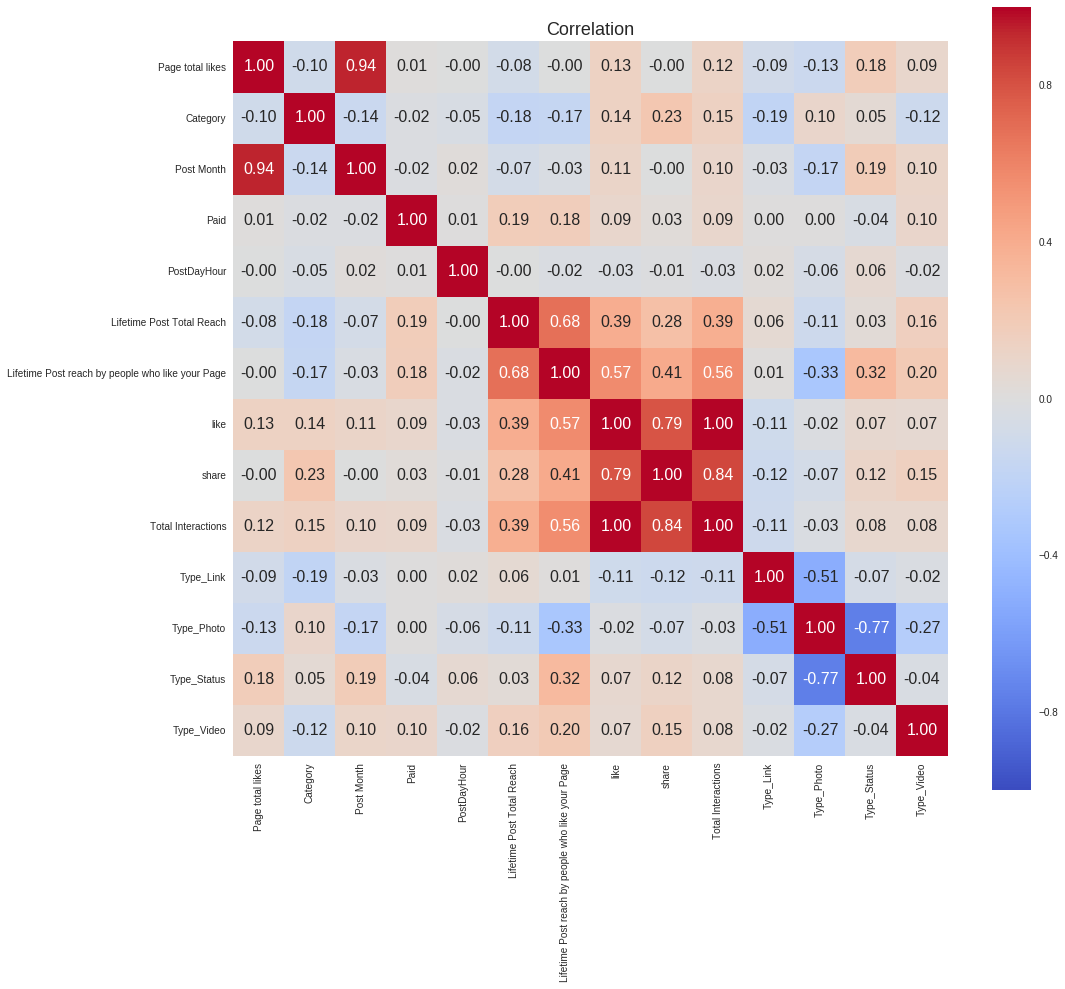

In [114]:
# ------------------------------------------------------------------------------------------
plot_correlation_map(fbMinusOutliers)
# ------------------------------------------------------------------------------------------


#### ![Model Training](https://i.supload.com/SyG2xgK0TX.png)     


In [115]:
# -----------------------------------------------------------------------------------------------------------------------
features = list(fbMinusOutliers.columns) # after the dummy in, need to exclude target and rest but include the new col

print_variable_html(f'Columns in dataset are')
display(pd.DataFrame(fbMinusOutliers.columns))
# features = features[1:] # need to exclude target and rest but include the new cols
# -----------------------------------------------------------------------------------------------------------------------


0
0                                   Page total likes
1                                           Category
2                                         Post Month
3                                               Paid
4                                        PostDayHour
5                          Lifetime Post Total Reach
6   Lifetime Post reach by people who like your Page
7                                               like
8                                              share
9                                 Total Interactions
10                                         Type_Link
11                                        Type_Photo
12                                       Type_Status
13                                        Type_Video

<hr>

### <font color='blue'>Train Test Split</font>

In [0]:
# features.remove('Lifetime Post Total Reach')
# features.remove('Lifetime Post reach by people who like your Page')
# features.remove('like')
# features.remove('share')
# print_variable_html(f'Features for training the model are: {features}')


In [116]:
# -----------------------------------------------------------------------------------------------------------------------
features = ['Page total likes', 'Category', 'Post Month', 'Paid', 'PostDayHour',
            'Type_Link', 'Type_Photo', 'Type_Status', 'Type_Video']

X = fbMinusOutliers[features]
y = fbMinusOutliers[target]

df_sample(X,4)
df_sample(y,4)
# -----------------------------------------------------------------------------------------------------------------------

Page total likes  Category  Post Month  Paid  PostDayHour  Type_Link  \
198            133451         1           8   1.0          409          0   
232            131630         2           7   1.0          206          0   
378            111620         1           4   1.0          206          0   
496             81370         2           1   0.0          508          0   

     Type_Photo  Type_Status  Type_Video  
198           1            0           0  
232           0            1           0  
378           1            0           0  
496           1            0           0

12     2072
79     3224
331    2528
454    6260
Name: Lifetime Post reach by people who like your Page, dtype: int64

In [117]:
# -----------------------------------------------------------------------------------------------------------------------
test_size = 0.1  # Percent for split test train 0.1 for 10%
print_variable_html(f'Splitting {test_size*100}% for test set')

X_train_O, X_test_O, y_train_O, y_test_O = train_test_split(X, y, test_size=0.2)
print_variable_html(f'X_train_O.shape = {X_train_O.shape}, y_train_O.shape = {y_train_O.shape}, X_test_O.shape = {X_test_O.shape}, y_test_O.shape = {y_test_O.shape}')
if (X_train_O.shape[0]!=y_train_O.shape[0]):
    print_variable_html('Number of rows in X_train does not match that of y_train')
if (X_train_O.shape[1]!=X_test_O.shape[1]):
    print_variable_html('Number of columns in X_train does not match data of X_test')
if (X_test_O.shape[0]!=y_test_O.shape[0]):
    print_variable_html('Number of rows in X_test does not match that of y_test')
# -----------------------------------------------------------------------------------------------------------------------


<hr>

#### <font color='blue'>Linear  Regression</font>

In [118]:
# -----------------------------------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = X_train_O.copy(), X_test_O.copy(), y_train_O.copy(), y_test_O.copy()
reg = linear_model.LinearRegression(normalize=True)
reg.fit(X_train,y_train)

display(reg.coef_)
# -----------------------------------------------------------------------------------------------------------------------

array([ 8.58698801e-02, -1.06721291e+03, -6.04242152e+02,  1.89238404e+03,
       -6.63939908e-01, -2.39649742e+03, -2.30942068e+03,  3.47850691e+03,
        6.61266517e+03])

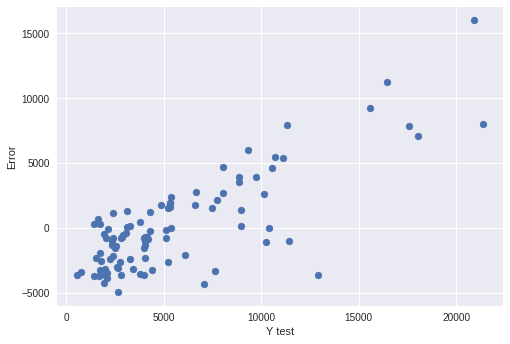

In [119]:
# -----------------------------------------------------------------------------------------------------------------------
pred_linear = reg.predict(X_test)
pred_train_linear = reg.predict(X_train)
error_linear = y_test - pred_linear
plt.scatter(y_test, error_linear)
plt.xlabel("Y test")
plt.ylabel("Error")
plt.show()

# -----------------------------------------------------------------------------------------------------------------------

In [0]:
# -----------------------------------------------------------------------------------------------------------------------
testScoreLinear = r2_score(y_pred=pred_linear,y_true=y_test)
trainScoreLinear = r2_score(y_pred=pred_train_linear,y_true=y_train)
# -----------------------------------------------------------------------------------------------------------------------

<hr>

#### <font color='blue'>Lasso Regression</font>

In [121]:
# -----------------------------------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = X_train_O.copy(), X_test_O.copy(), y_train_O.copy(), y_test_O.copy()
lasso = linear_model.Lasso(normalize=True)
lasso.fit(X_train,y_train)

display(lasso.coef_)
# -----------------------------------------------------------------------------------------------------------------------

array([ 6.48062508e-02, -1.01935402e+03, -4.96878585e+02,  1.86480518e+03,
       -6.23910497e-01, -6.05701902e+01, -0.00000000e+00,  5.67420113e+03,
        8.69488494e+03])

Text(0,0.5,'Error')

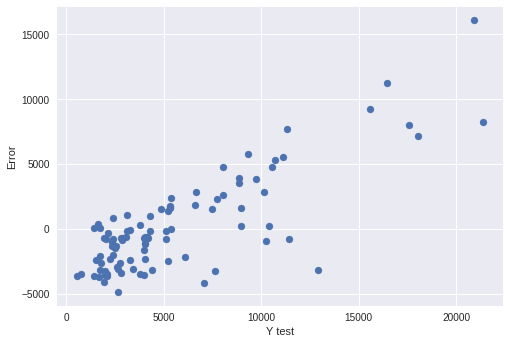

In [122]:
# -----------------------------------------------------------------------------------------------------------------------
pred_lasso = lasso.predict(X_test)
pred_train_lasso = lasso.predict(X_train)
error_lasso = y_test - pred_lasso
plt.scatter(y_test, error_lasso)
plt.xlabel("Y test")
plt.ylabel("Error")
# -----------------------------------------------------------------------------------------------------------------------


In [0]:
# -----------------------------------------------------------------------------------------------------------------------
testScoreLasso = r2_score(y_pred=pred_lasso,y_true=y_test)
trainScoreLasso = r2_score(y_pred=pred_train_lasso,y_true=y_train)
# -----------------------------------------------------------------------------------------------------------------------


#### ![Model Evaluation](https://i.supload.com/ryQngeKC6X.png)     


In [0]:
# -----------------------------------------------------------------------------------------------------------------------
result_linear  = pd.DataFrame()
result_linear['Linear Regression Step'] = ['Train','Test']
result_linear['Score'] = [trainScoreLinear,testScoreLinear]

result_lasso  = pd.DataFrame()
result_lasso['Lasso Regression Step'] = ['Train','Test']
result_lasso['Score'] = [trainScoreLasso,testScoreLasso]
# -----------------------------------------------------------------------------------------------------------------------


In [125]:
# -----------------------------------------------------------------------------------------------------------------------
display_side_by_side(result_linear, result_lasso)
# -----------------------------------------------------------------------------------------------------------------------

Linear Regression Step 
 Score 
 
 
 
 
 0 
 Train 
 0.210791 
 
 
 1 
 Test 
 0.306979 
 
 
 
 
 
 
 Lasso Regression Step 
 Score 
 
 
 
 
 0 
 Train 
 0.210104 
 
 
 1 
 Test 
 0.312204

Text(0.5,1,'R^2 Scores - Linear Regression')

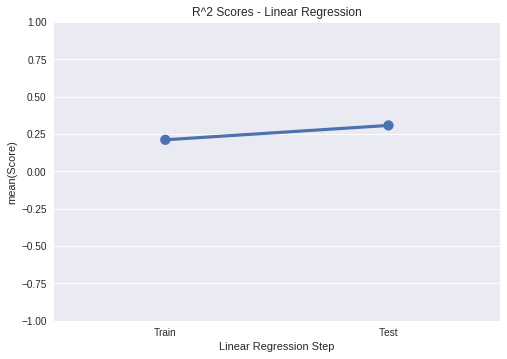

In [126]:
# -----------------------------------------------------------------------------------------------------------------------
sns.pointplot(y=result_linear['Score'],x=result_linear['Linear Regression Step'])
plt.ylim([-1,1])
plt.title('R^2 Scores - Linear Regression')
# -----------------------------------------------------------------------------------------------------------------------


Text(0.5,1,'R^2 Scores - Lasso Regression')

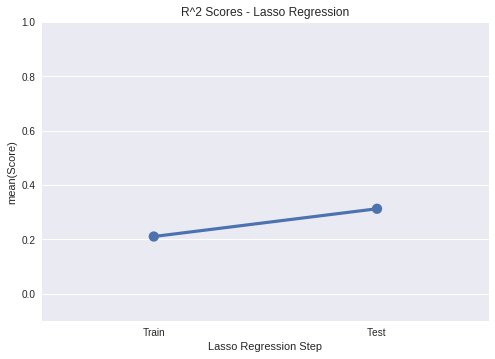

In [127]:
# ------------------------------------------------------------------------------------------
sns.pointplot(y=result_lasso['Score'],x=result_lasso['Lasso Regression Step'])
plt.ylim([-.1,1])
plt.title('R^2 Scores - Lasso Regression')
# ------------------------------------------------------------------------------------------

<hr> 

<font color='blue'>**Observation:**</font> The scores for Linear Regression and Lasso Regression are not far each other. I didn't want to decide yet or it does not seem to matter much which one I choose. I ran a few times and all seem not far. So, I tried another model: Random Forest Regression.

<hr>

#### <font color='blue'>Random Forest Regression with default parameters</blue>





In [128]:
# ------------------------------------------------------------------------------------------
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = X_train_O.copy(), X_test_O.copy(), y_train_O.copy(), y_test_O.copy()
random_forest = RandomForestRegressor() 
random_forest.fit(X_train,y_train)
# ------------------------------------------------------------------------------------------


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Text(0,0.5,'Error')

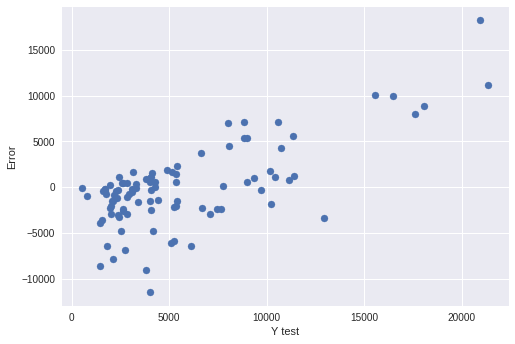

In [129]:
# ------------------------------------------------------------------------------------------
pred_random_forest = random_forest.predict(X_test)
pred_train_random_forest = random_forest.predict(X_train)

testScoreRandomForest = r2_score(y_pred=pred_random_forest,y_true=y_test)
trainScoreRandomForest = r2_score(y_pred=pred_train_random_forest,y_true=y_train)

error_random_forest = y_test - pred_random_forest
plt.scatter(y_test, error_random_forest)
plt.xlabel("Y test")
plt.ylabel("Error")
# ------------------------------------------------------------------------------------------


In [130]:
# ------------------------------------------------------------------------------------------

result_random_forest = pd.DataFrame()
result_random_forest['Random Forest Regression Step'] = ['Train', 'Test']
result_random_forest['Score'] = [round(trainScoreRandomForest,4),round(testScoreRandomForest,4)]
result_random_forest
# ------------------------------------------------------------------------------------------


Random Forest Regression Step   Score
0                         Train  0.8439
1                          Test -0.0055

Text(0.5,1,'R^2 Scores - Random Forest Regression')

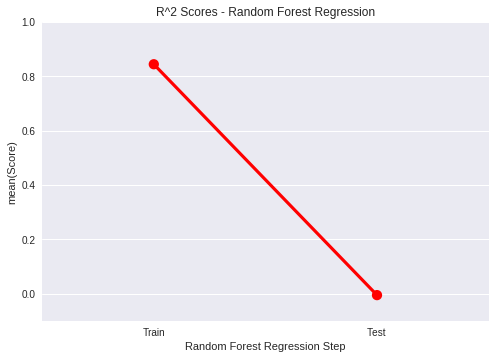

In [131]:
# ------------------------------------------------------------------------------------------
sns.pointplot(y=result_random_forest['Score'],x=result_random_forest['Random Forest Regression Step'],color='Red')
plt.ylim([-.1,1])
plt.title('R^2 Scores - Random Forest Regression')
# ------------------------------------------------------------------------------------------


<font color='blue'>**Observation**:</font> Quite clearly overfitting when using the default parameters looking at the difference between the Train and Test scores. 

In [132]:
# ------------------------------------------------------------------------------------------
predicted_test = random_forest.predict(X_test)

fI = pd.DataFrame()
fI['Variable'] = list(X_train.columns)
fI['Importance'] = random_forest.feature_importances_
fI.sort_values(by='Importance',ascending=False)[0:15]
# ------------------------------------------------------------------------------------------


Variable  Importance
0  Page total likes    0.304218
4       PostDayHour    0.299545
2        Post Month    0.106909
1          Category    0.101473
3              Paid    0.065391
6        Type_Photo    0.052354
7       Type_Status    0.039703
5         Type_Link    0.025049
8        Type_Video    0.005357

<hr>

#### <font color='blue'>Removing a few feature "it" didn't like anyway.</font>


In [0]:
# ------------------------------------------------------------------------------------------
X_new_train = X_train_O.drop(['Type_Status', 'Type_Link', 'Type_Video'], axis=1).copy()
X_new_test = X_test_O.drop(['Type_Status', 'Type_Link', 'Type_Video'], axis=1).copy()
# ------------------------------------------------------------------------------------------

<hr>

#### <font color='blue'>Random Forest Regression  with few features dropped.</font>

In [134]:
# ------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = X_new_train.copy(), X_new_test.copy(), y_train_O.copy(), y_test_O.copy()
random_forest = RandomForestRegressor()

random_forest.fit(X_train,y_train)
# ------------------------------------------------------------------------------------------


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

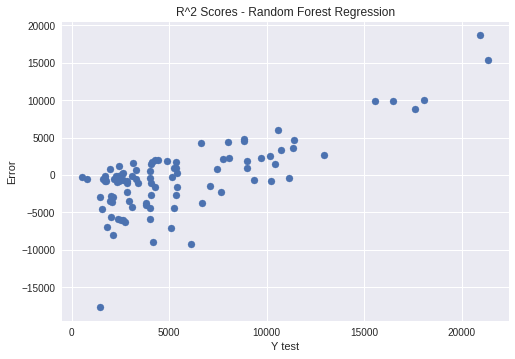

In [135]:
# ------------------------------------------------------------------------------------------
pred_random_forest = random_forest.predict(X_test)
pred_train_random_forest = random_forest.predict(X_train)
testScoreRandomForest = r2_score(y_pred=pred_random_forest,y_true=y_test)
trainScoreRandomForest = r2_score(y_pred=pred_train_random_forest,y_true=y_train)

error_random_forest = y_test - pred_random_forest
plt.scatter(y_test, error_random_forest)
plt.xlabel("Y test")
plt.ylabel("Error")
plt.title('R^2 Scores - Random Forest Regression')
plt.show()
# ------------------------------------------------------------------------------------------

In [136]:
# ------------------------------------------------------------------------------------------
result_random_forest = pd.DataFrame()
result_random_forest['Random Forest Regression Step'] = ['Train', 'Test']
result_random_forest['Score'] = [round(trainScoreRandomForest,4),round(testScoreRandomForest,4)]
result_random_forest
# ------------------------------------------------------------------------------------------


Random Forest Regression Step   Score
0                         Train  0.8398
1                          Test -0.2076

Text(0.5,1,'R^2 Scores - Random Foest  Regression')

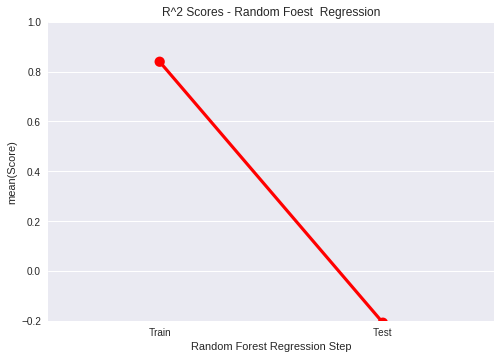

In [137]:
# ------------------------------------------------------------------------------------------
sns.pointplot(y=result_random_forest['Score'],x=result_random_forest['Random Forest Regression Step'],color='Red')
plt.ylim([-.2,1])
plt.title('R^2 Scores - Random Foest  Regression')
# ------------------------------------------------------------------------------------------

<font color='blue'>**Observation**:</font> Random Forest Regression is still overfitting quite a lot after dropping a few features.

<hr>

#### <font color='blue'> Random Forest with tuning different parameters</font>

In [138]:
# ------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = X_new_train.copy(), X_new_test.copy(), y_train_O.copy(), y_test_O.copy()    
defaults_for_reference = """
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)""" 
random_forest = RandomForestRegressor(n_estimators=30, min_samples_split=2, max_depth=4, min_samples_leaf=6)  # Train Score/Test Score = 0.2221 / 0.1099

random_forest.fit(X_train,y_train)
# ------------------------------------------------------------------------------------------

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


#### <font color='blue'>Here, I'm recording of scores from run with setting of different parameters</font>
random_forest = RandomForestRegressor(n_estimators=500, min_samples_split=2, max_depth=8, min_samples_leaf=1)  # Train Score/Test Score = 0.6900 / 0.0322
random_forest = RandomForestRegressor(n_estimators=500, min_samples_split=2, max_depth=4, min_samples_leaf=1)  # Train Score/Test Score = 0.2792 / 0.0892
random_forest = RandomForestRegressor(n_estimators=500, min_samples_split=2, max_depth=6, min_samples_leaf=1)  # Train Score/Test Score = 0.4964 / 0.0831
random_forest = RandomForestRegressor(n_estimators=500, min_samples_split=4, max_depth=6, min_samples_leaf=1)  # Train Score/Test Score = 0.4787 / 0.0894
random_forest = RandomForestRegressor(n_estimators=500, min_samples_split=8, max_depth=6, min_samples_leaf=1)  # Train Score/Test Score = 0.4254 / 0.1129
random_forest = RandomForestRegressor(n_estimators=500, min_samples_split=2, max_depth=5, min_samples_leaf=1)  # Train Score/Test Score = 0.3850 / 0.0958
random_forest = RandomForestRegressor(n_estimators=500, min_samples_split=2, max_depth=6, min_samples_leaf=1)  # Train Score/Test Score = 0.4967 / 0.0811
random_forest = RandomForestRegressor(n_estimators=500, min_samples_split=2, max_depth=5, min_samples_leaf=2)  # Train Score/Test Score = 0.3534 / 0.1041 
random_forest = RandomForestRegressor(n_estimators=500, min_samples_split=2, max_depth=5, min_samples_leaf=3)  # Train Score/Test Score = 0.3326 / 0.1006 
random_forest = RandomForestRegressor(n_estimators=500, min_samples_split=2, max_depth=5, min_samples_leaf=4)  # Train Score/Test Score = 0.3188 / 0.1016 
random_forest = RandomForestRegressor(n_estimators=400, min_samples_split=2, max_depth=5, min_samples_leaf=6)  # Train Score/Test Score = 0.2863 / 0.1034 
random_forest = RandomForestRegressor(n_estimators=300, min_samples_split=2, max_depth=5, min_samples_leaf=6)  # Train Score/Test Score = 0.2885 / 0.1050 
random_forest = RandomForestRegressor(n_estimators=200, min_samples_split=2, max_depth=5, min_samples_leaf=6)  # Train Score/Test Score = 0.2869 / 0.0998
random_forest = RandomForestRegressor(n_estimators=100, min_samples_split=2, max_depth=5, min_samples_leaf=6)  # Train Score/Test Score = 0.2926 / 0.1104 
random_forest = RandomForestRegressor(n_estimators=50, min_samples_split=2, max_depth=5, min_samples_leaf=6)  # Train Score/Test Score = 0.2906 / 0.1091
random_forest = RandomForestRegressor(n_estimators=30, min_samples_split=2, max_depth=5, min_samples_leaf=6)  # Train Score/Test Score = 0.2799 / 0.1124
random_forest = RandomForestRegressor(n_estimators=30, min_samples_split=2, max_depth=4, min_samples_leaf=6)  # Train Score/Test Score = 0.2221 / 0.1099


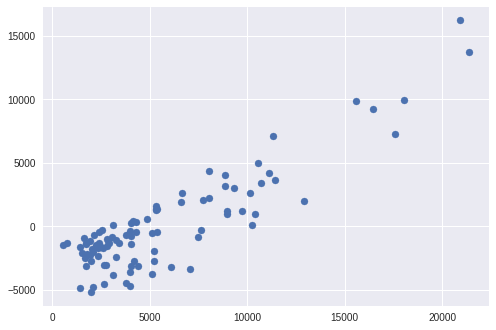

In [139]:
# ------------------------------------------------------------------------------------------
pred_random_forest = random_forest.predict(X_test)
pred_train_random_forest = random_forest.predict(X_train)


testScoreRandomForest = r2_score(y_pred=pred_random_forest,y_true=y_test)
trainScoreRandomForest = r2_score(y_pred=pred_train_random_forest,y_true=y_train)


error_random_forest = y_test - pred_random_forest
plt.scatter(y_test, error_random_forest)
plt.show()
# ------------------------------------------------------------------------------------------


In [140]:
# ------------------------------------------------------------------------------------------

result_random_forest = pd.DataFrame()
result_random_forest['Random Forest Regression Step'] = ['Train', 'Test']
result_random_forest['Score'] = [round(trainScoreRandomForest,4),round(testScoreRandomForest,4)]
result_random_forest
# ------------------------------------------------------------------------------------------


Random Forest Regression Step   Score
0                         Train  0.3083
1                          Test  0.2754

Text(0.5,1,'R^2 Scores')

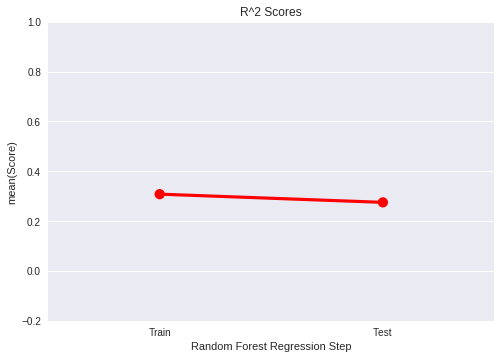

In [141]:
# ------------------------------------------------------------------------------------------
sns.pointplot(y=result_random_forest['Score'],x=result_random_forest['Random Forest Regression Step'],color='Red')
plt.ylim([-.2,1])
plt.title('R^2 Scores')
# ------------------------------------------------------------------------------------------


### ![Conclusion](https://i.supload.com/SJ43llF0pQ.png)     


*   The Random Forest Regressor seems to overfit in this case whether with the default parameters, dropping few less critical features or the tuning of parameters I tried. So, it's back to the ones I started with. 
*   Between the Linear Regressor and the Lasso Regressor, it is the latter which performed slightly better in the test step.    
*   Therefore, I decided to choose <font color='blue'>**Lasso Regressor**</font> as the model for predicting 'Lifetime Post reach by people who like your Page'.


In [143]:
# ------------------------------------------------------------------------------------------
# Save the trained model 
joblib.dump(lasso, 'facebook_metrics_lasso_trained_model.pkl') 
# ------------------------------------------------------------------------------------------

['facebook_metrics_lasso_trained_model.pkl']

![Separator](https://i.supload.com/H1SAcsx14.png)

<hr>

# <font color='blue'>References</font>

- [Titanic Data Science Solutions Python Notebook](https://www.kaggle.com/startupsci/titanic-data-science-solutions)
- [An Interactive Data Science Tutorial](https://www.kaggle.com/helgejo/an-interactive-data-science-tutorial)
- [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)
- [https://en.wikipedia.org/wiki/RMS_Titanic](https://en.wikipedia.org/wiki/RMS_Titanic)
- [https://en.wikipedia.org/wiki/Women_and_children_first](https://en.wikipedia.org/wiki/Women_and_children_first)
- [https://www.encyclopedia-titanica.org/](https://www.encyclopedia-titanica.org/)
- [UCI Facebook Metrics Notebook](https://github.com/Jacobdudee/FacebookMetricsPrediction-Python)
- [Housing Price Exploratory Data Analysis](https://www.kaggle.com/dgawlik/house-prices-eda)
- [A Study on Regression Applied to the Ames Dataset](https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset)
- [Regularized Linear Model Tutorial](https://www.kaggle.com/apapiu/regularized-linear-models)
- [https://archive.ics.uci.edu/ml/datasets/Facebook+metrics](https://archive.ics.uci.edu/ml/datasets/Facebook+metrics)
- Moro, S., et al., Predicting social media performance metrics and evaluation of the impact on brand building: A data
mining approach, Journal of Business Research (2016), [http://dx.doi.org/10.1016/j.jbusres.2016.02.010](http://dx.doi.org/10.1016/j.jbusres.2016.02.010)
- [Scikit-Learn Cheat Sheet: Python Machine Learning](https://www.datacamp.com/community/blog/scikit-learn-cheat-sheet)
- [https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side](https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side)



![https://i.supload.com/B1rBqCLkE.jpg](https://i.supload.com/B1rBqCLkE.jpg)

In [142]:
# Youtube
print_variable_html('Perhaps, time for some music now', '(Source: Youtube)')
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/mEfOQ8hkQpQ" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')
